In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('train.csv')

In [82]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [84]:
df.drop('Unnamed: 0',axis =1,inplace = True)
df.drop('Arrival Delay in Minutes',axis = 1,inplace = True)
df.drop('id',axis=1,inplace =True)

In [85]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [88]:
num_col=["Age","Departure Delay in Minutes" ,"Arrival Delay in Minutes","Flight Distance"]

In [90]:
cat_col = [x for x in df.columns if x not in num_col]
cat_col

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

In [92]:
df[cat_col]=df[cat_col].astype('category')

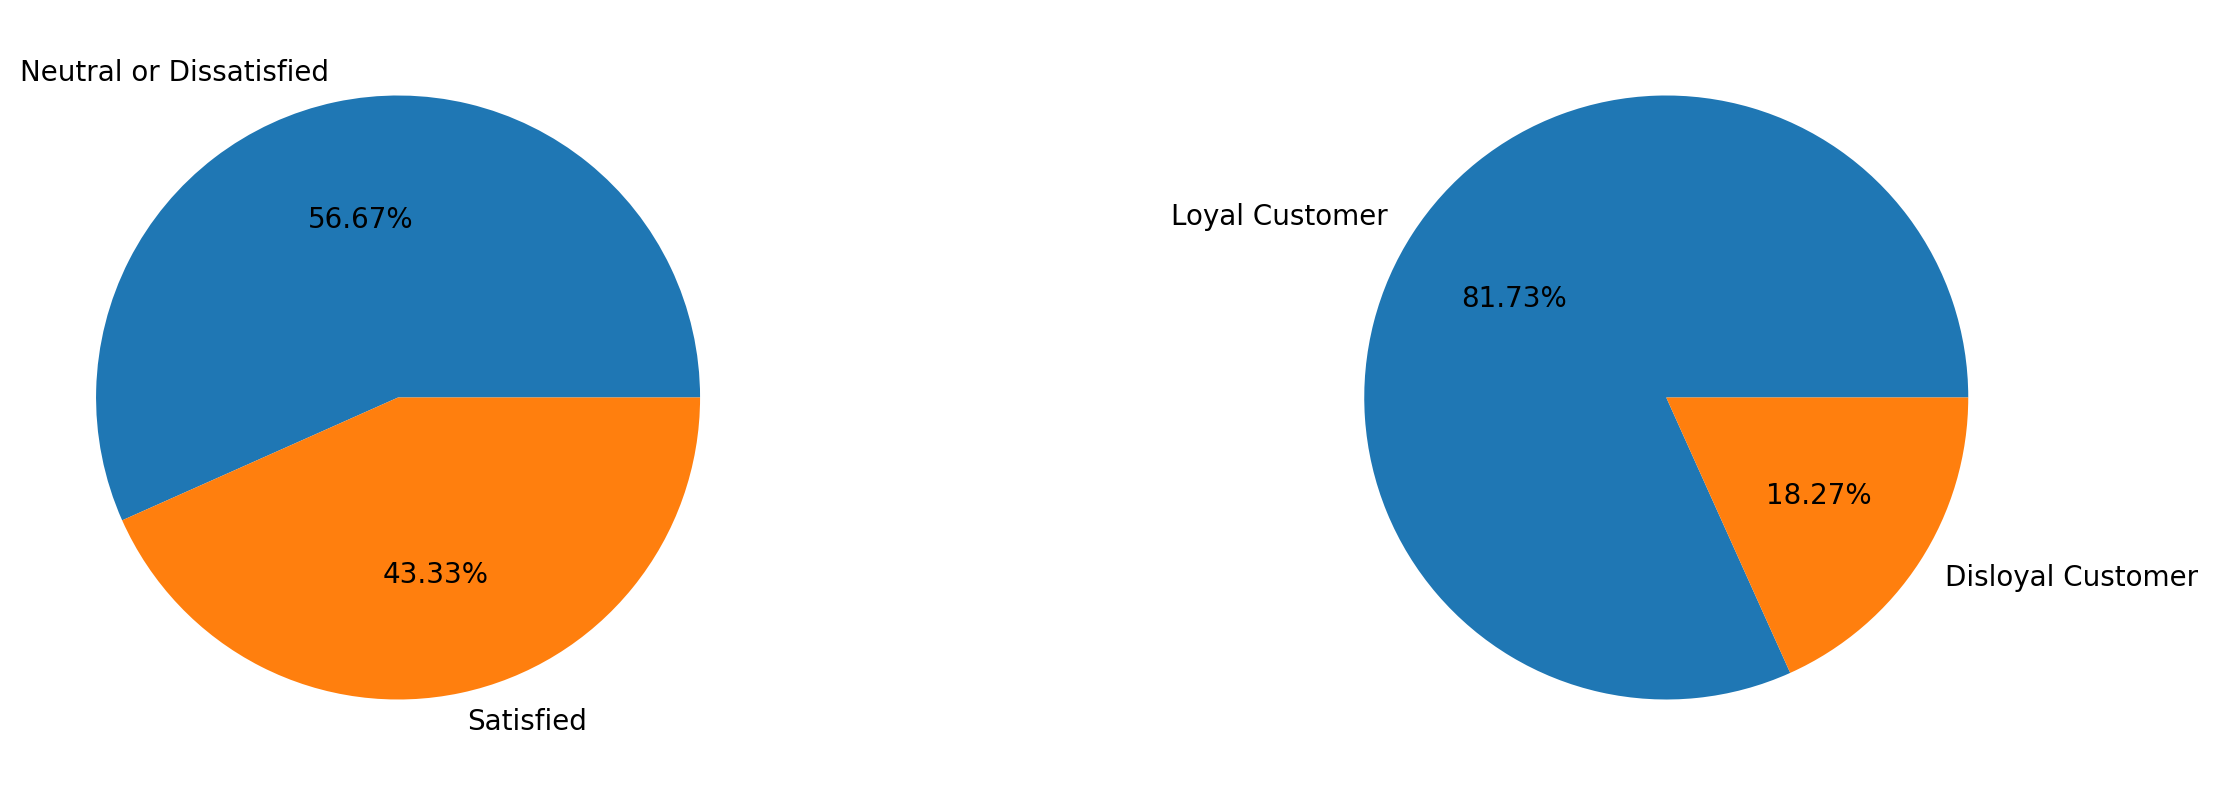

In [86]:
fig,axes = plt.subplots(1,2, figsize= (15,5),dpi = 200)
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['satisfaction'].value_counts(),labels = ['Neutral or Dissatisfied', 'Satisfied'], autopct='%.2f%%')

ax2 = plt.subplot2grid((1,2),(0,1))
plt.pie(df['Customer Type'].value_counts(),labels = ['Loyal Customer', 'Disloyal Customer'],autopct= '%.2f%%');

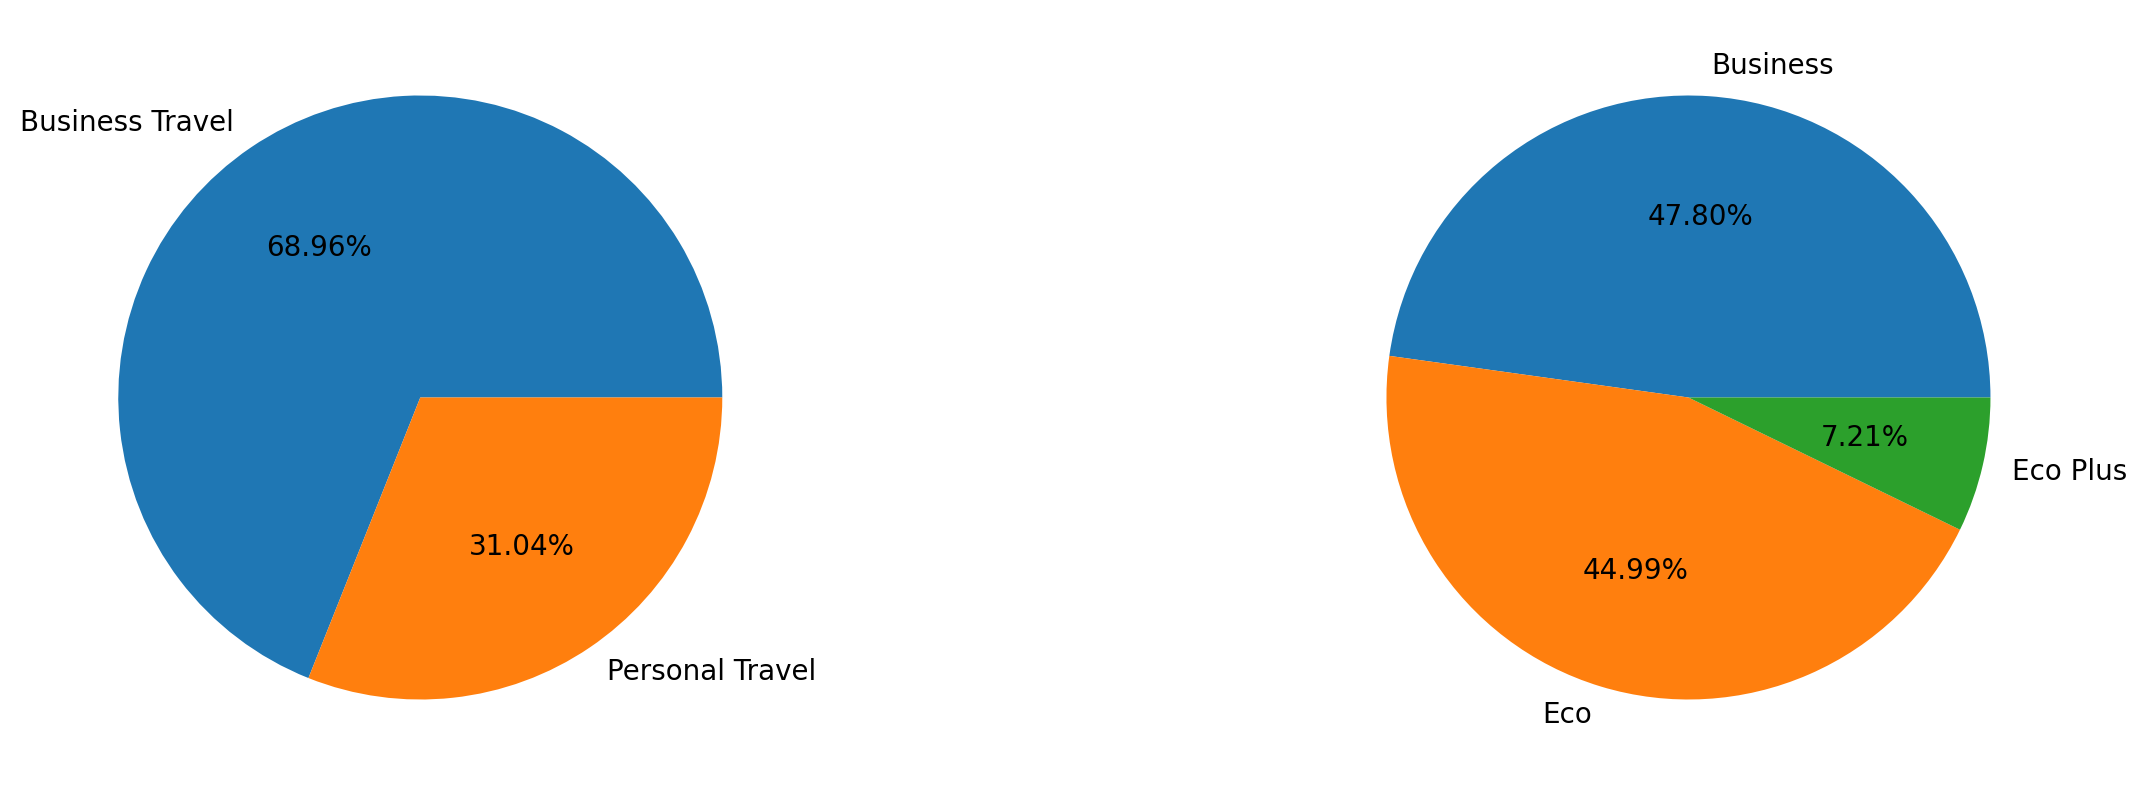

In [46]:
fig,axes = plt.subplots(1,2,figsize = (15,5),dpi = 200)
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['Type of Travel'].value_counts(),labels = ['Business Travel','Personal Travel'],autopct = '%.2f%%')

ax2 = plt.subplot2grid((1,2),(0,1))
plt.pie(df['Class'].value_counts(),labels = ['Business','Eco','Eco Plus'],autopct = '%.2f%%');

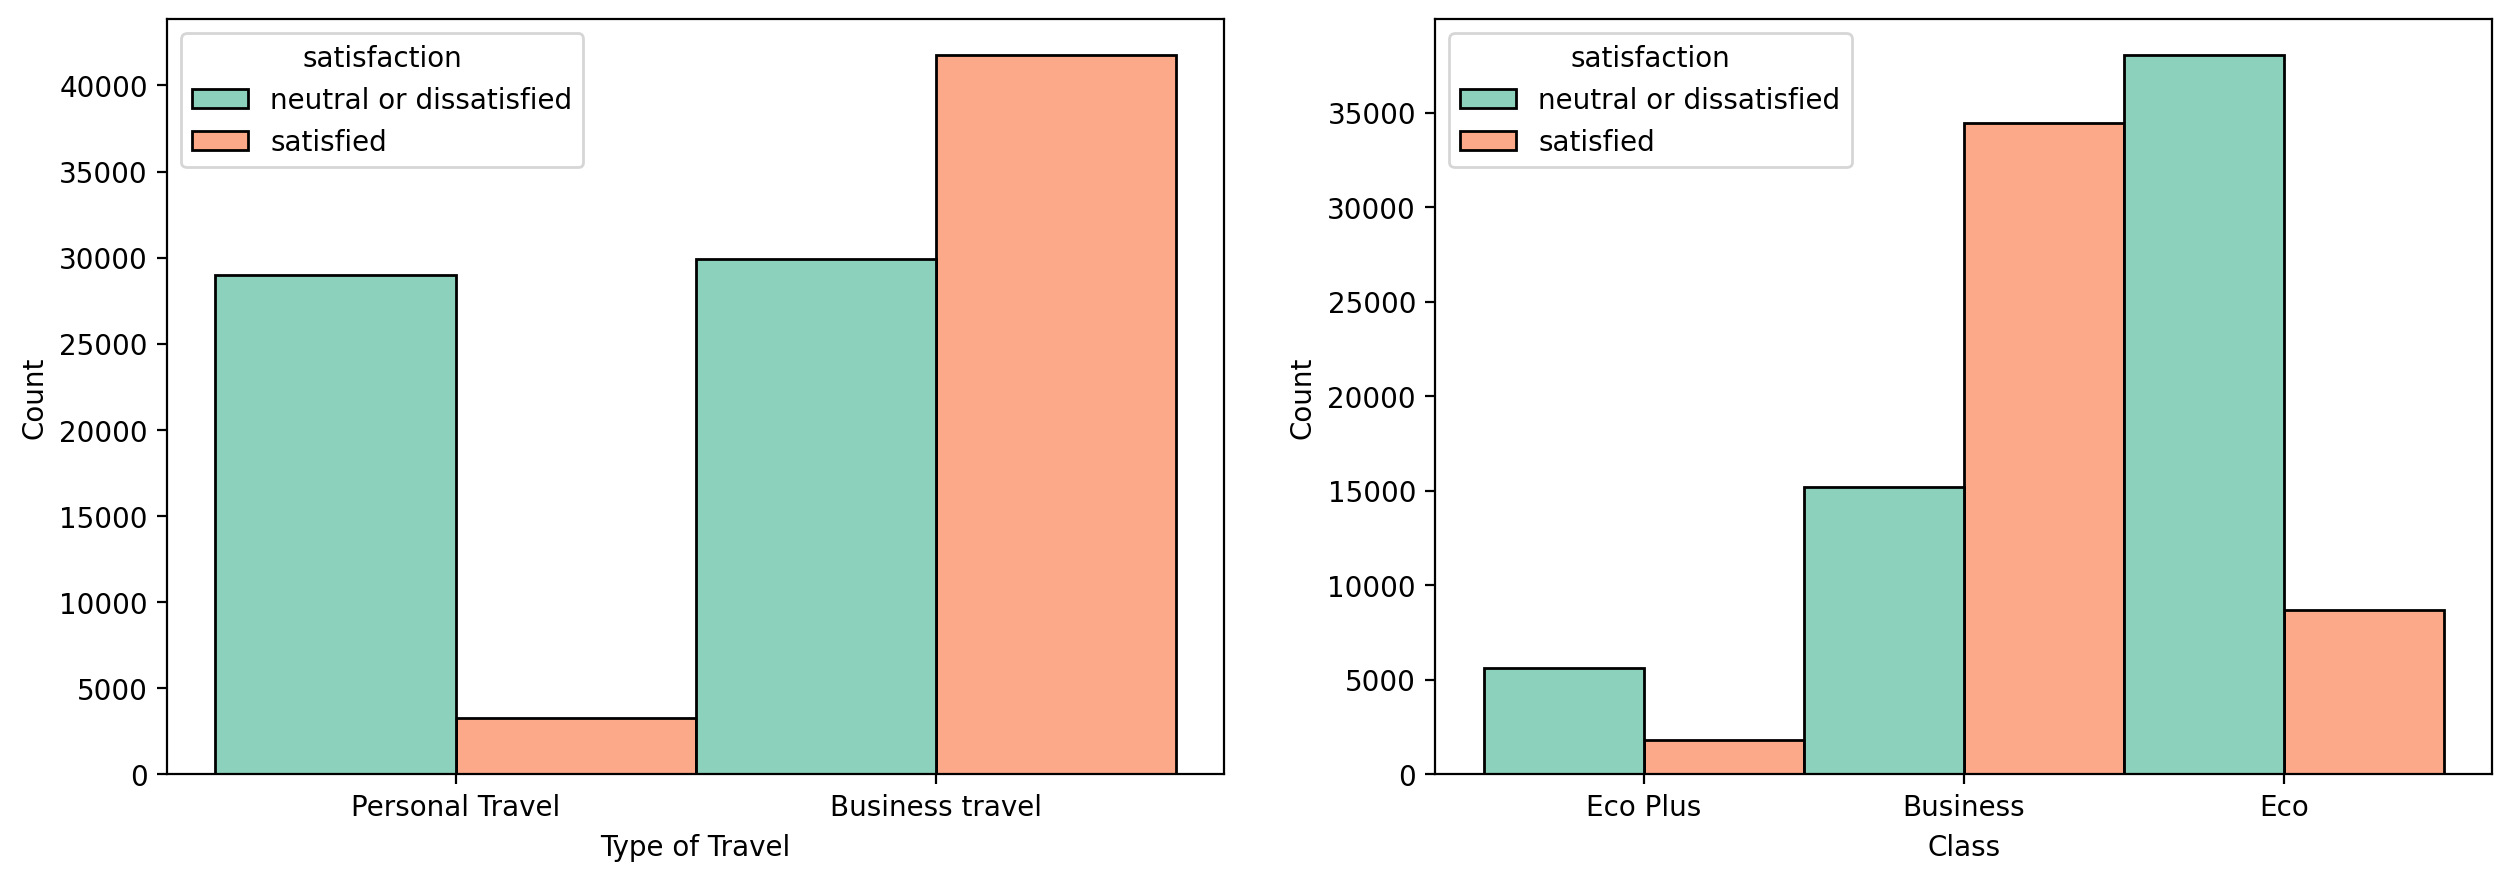

In [47]:
fig,axes = plt.subplots(1,2,figsize=(15,5),dpi = 200)

sns.histplot(data = df,x = df['Type of Travel'],hue = df['satisfaction'],multiple = 'dodge',palette = 'Set2',ax = axes[0])

sns.histplot(data =df,x = df['Class'],hue = df['satisfaction'],multiple = 'dodge',palette = 'Set2');

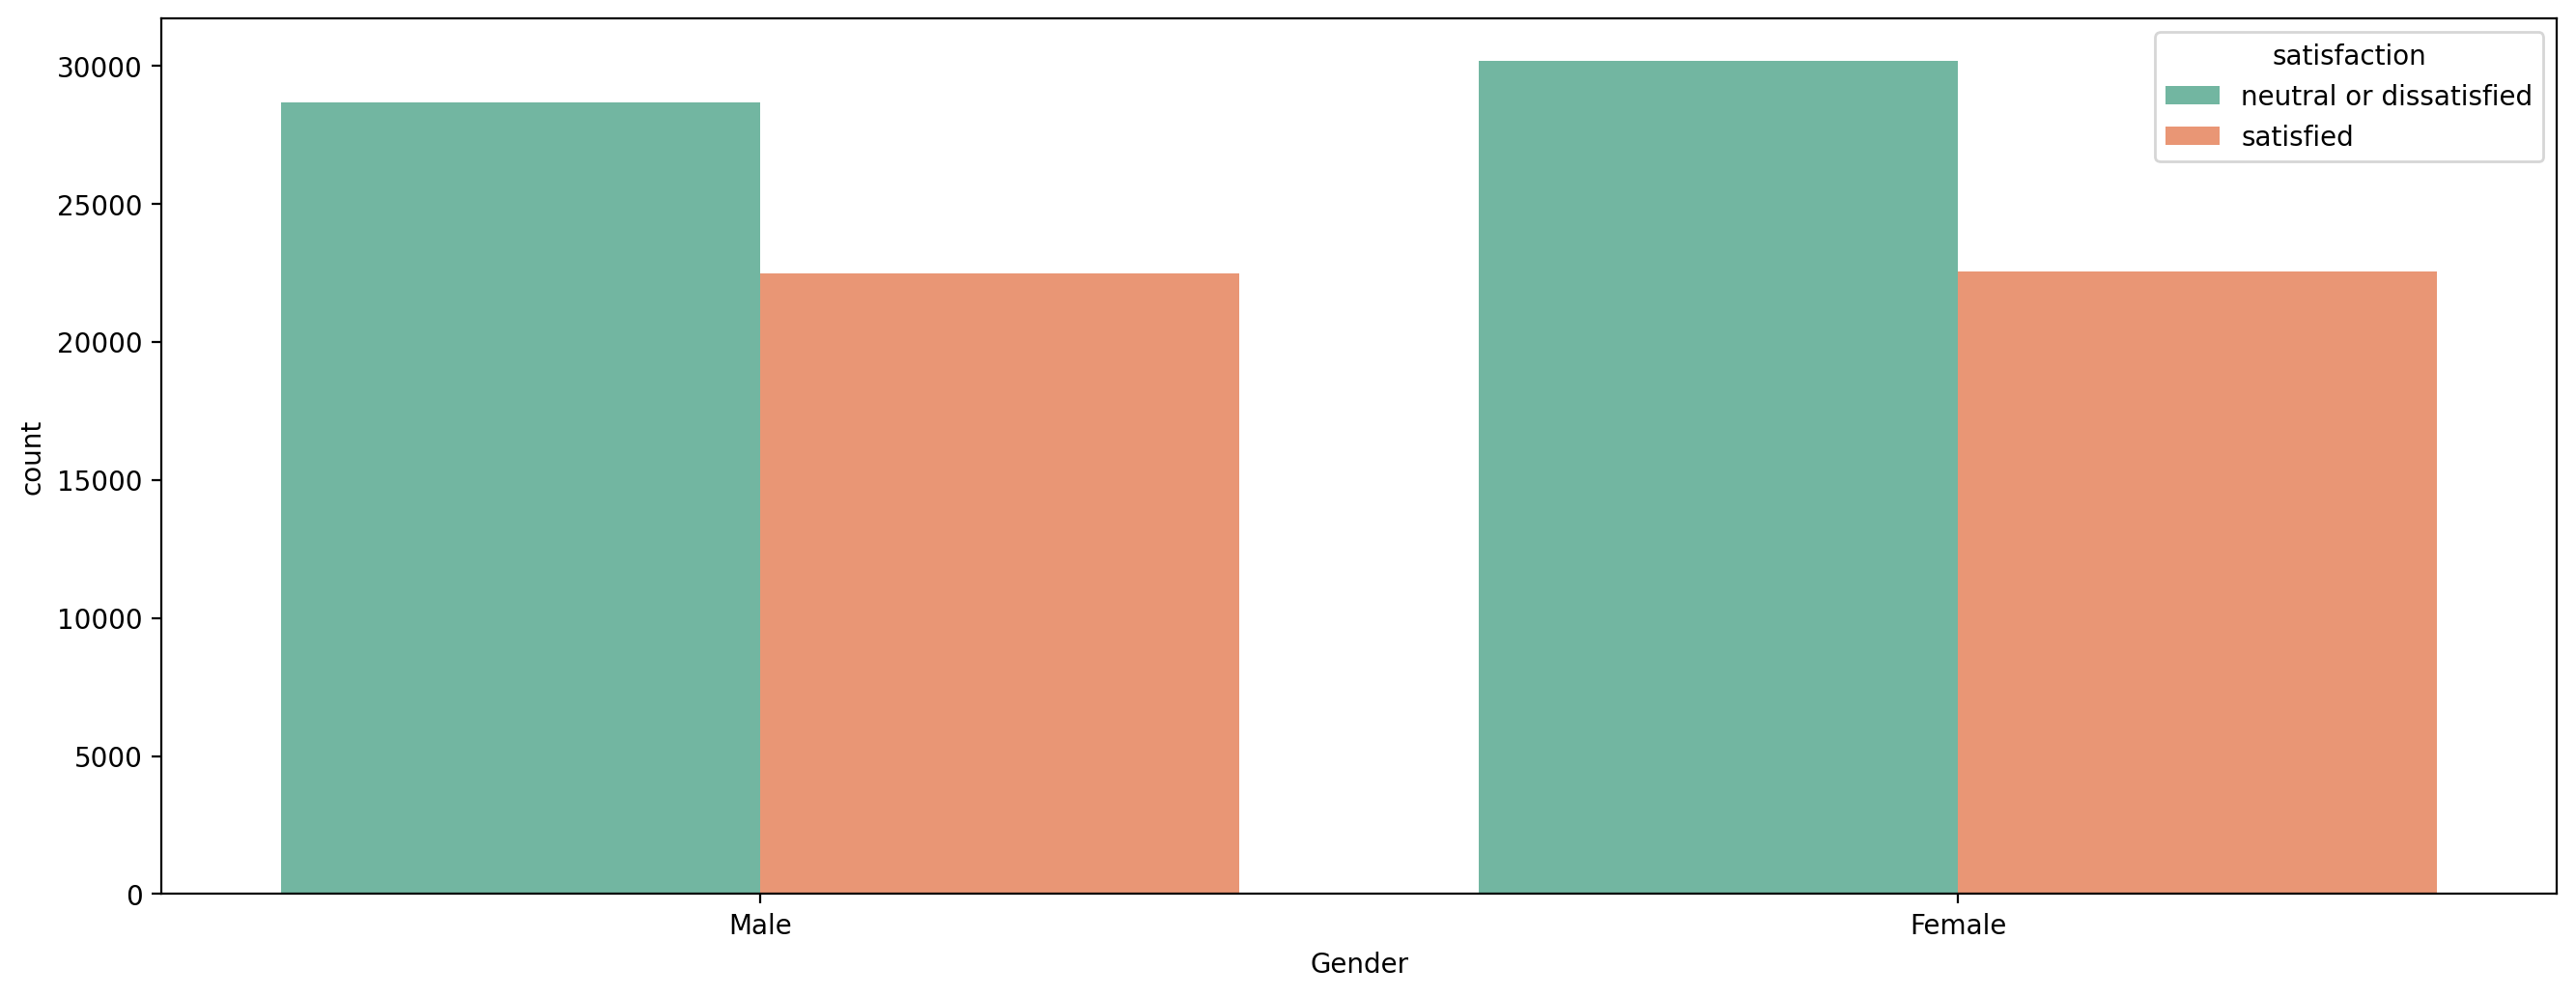

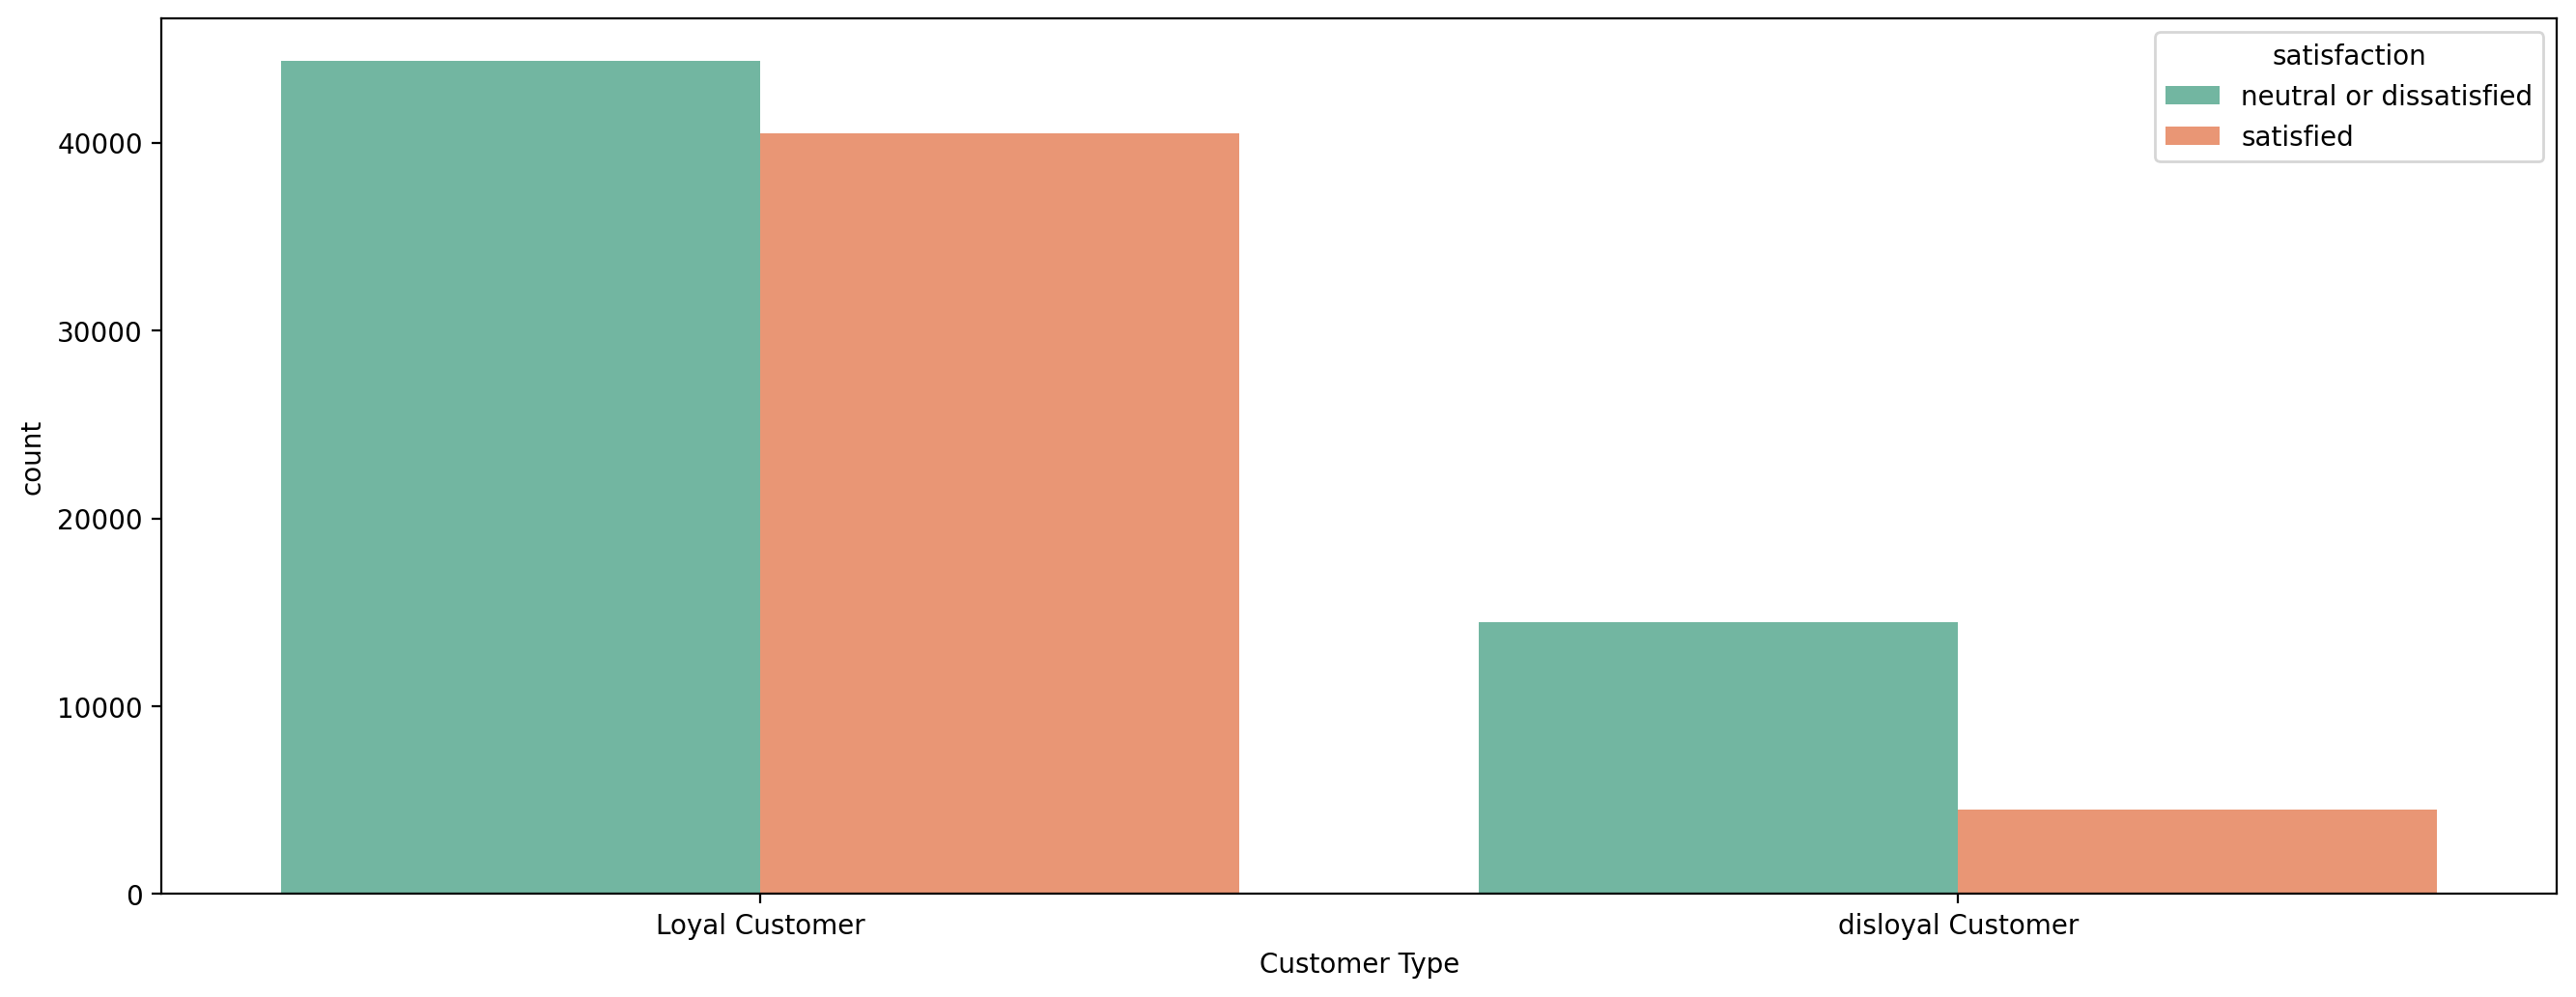

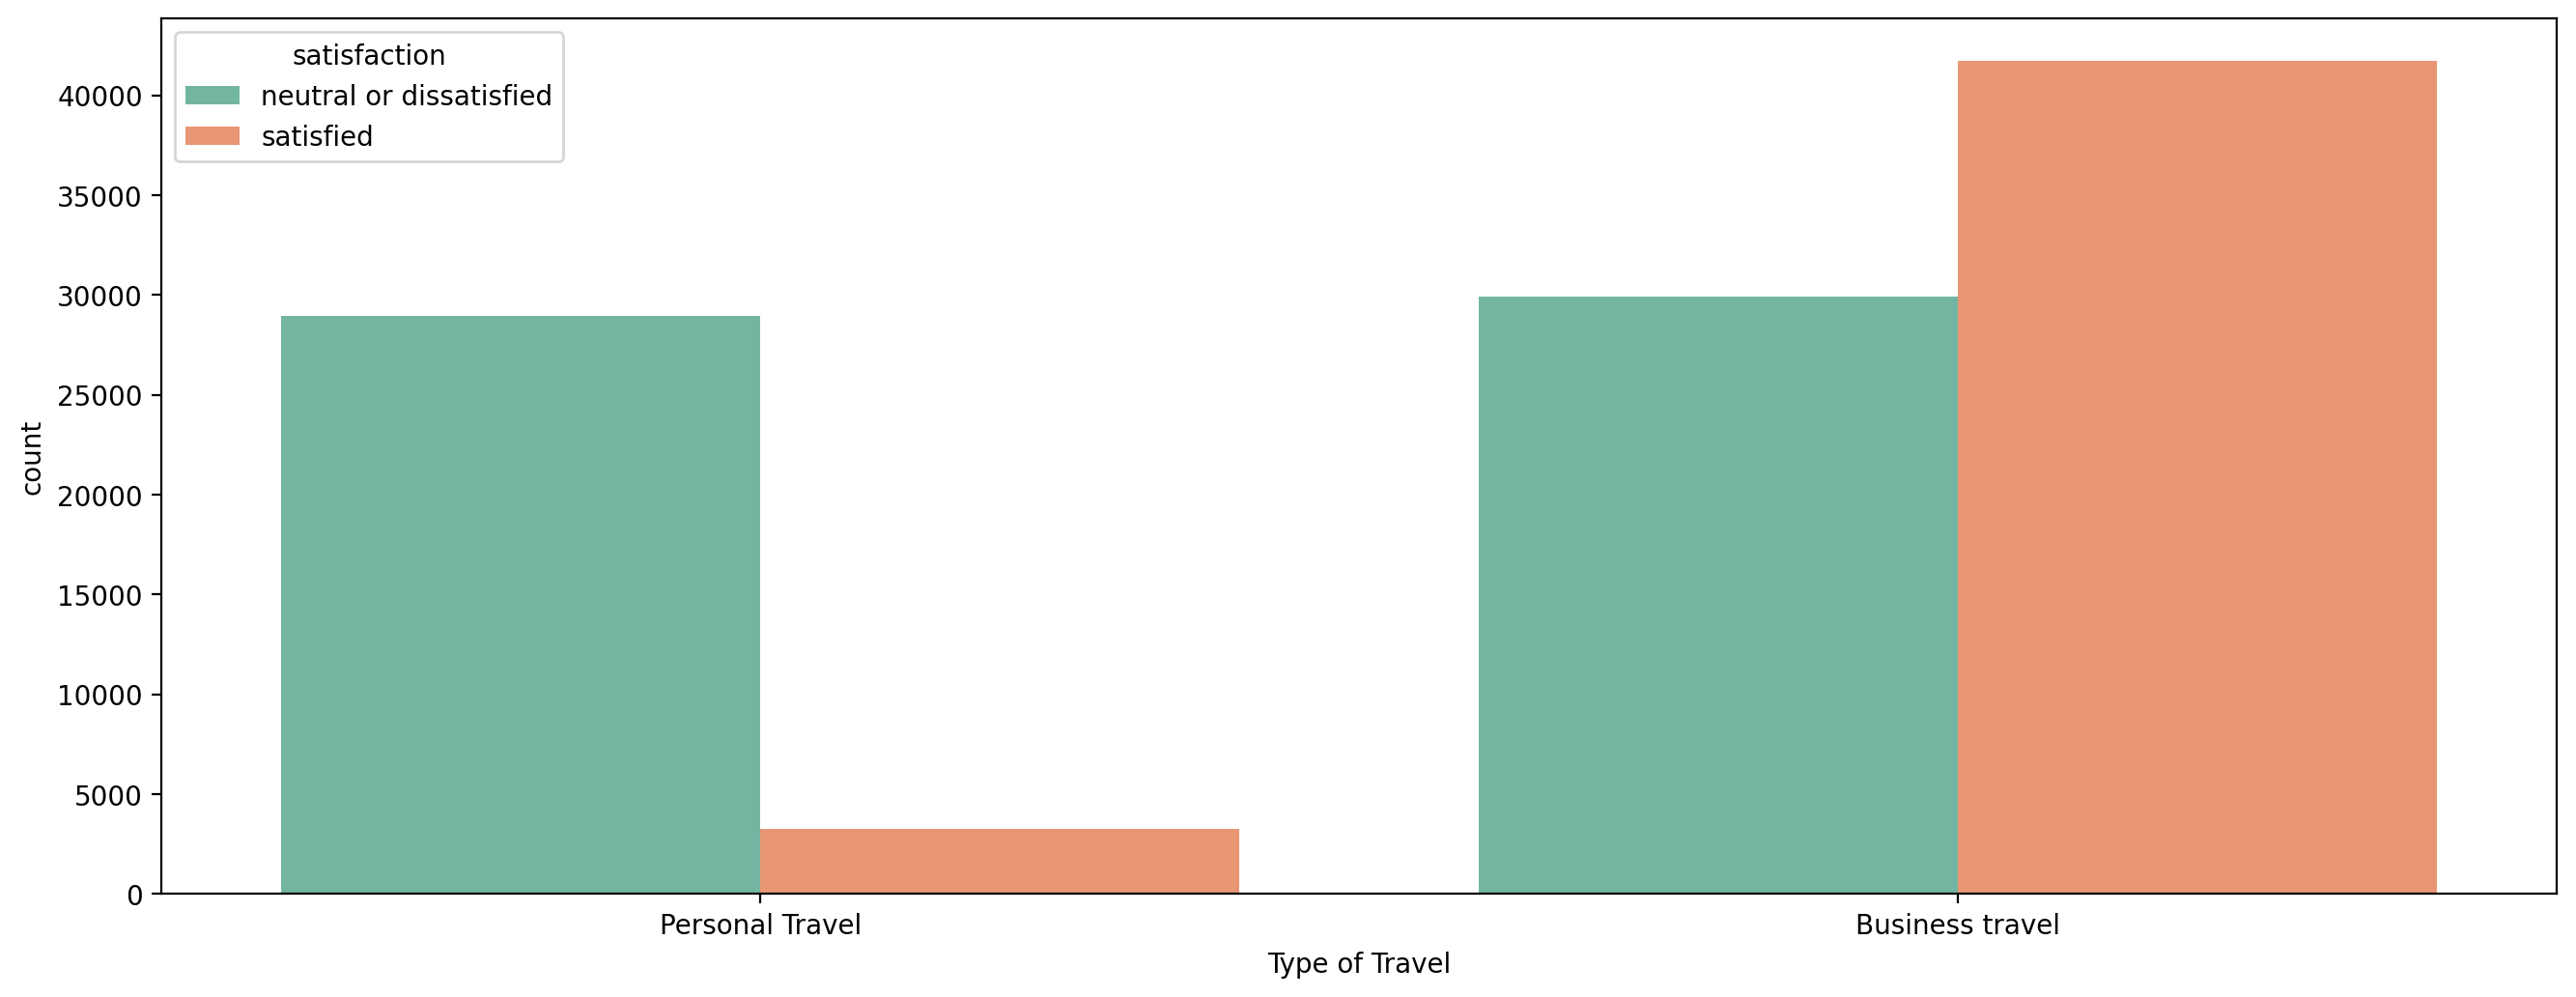

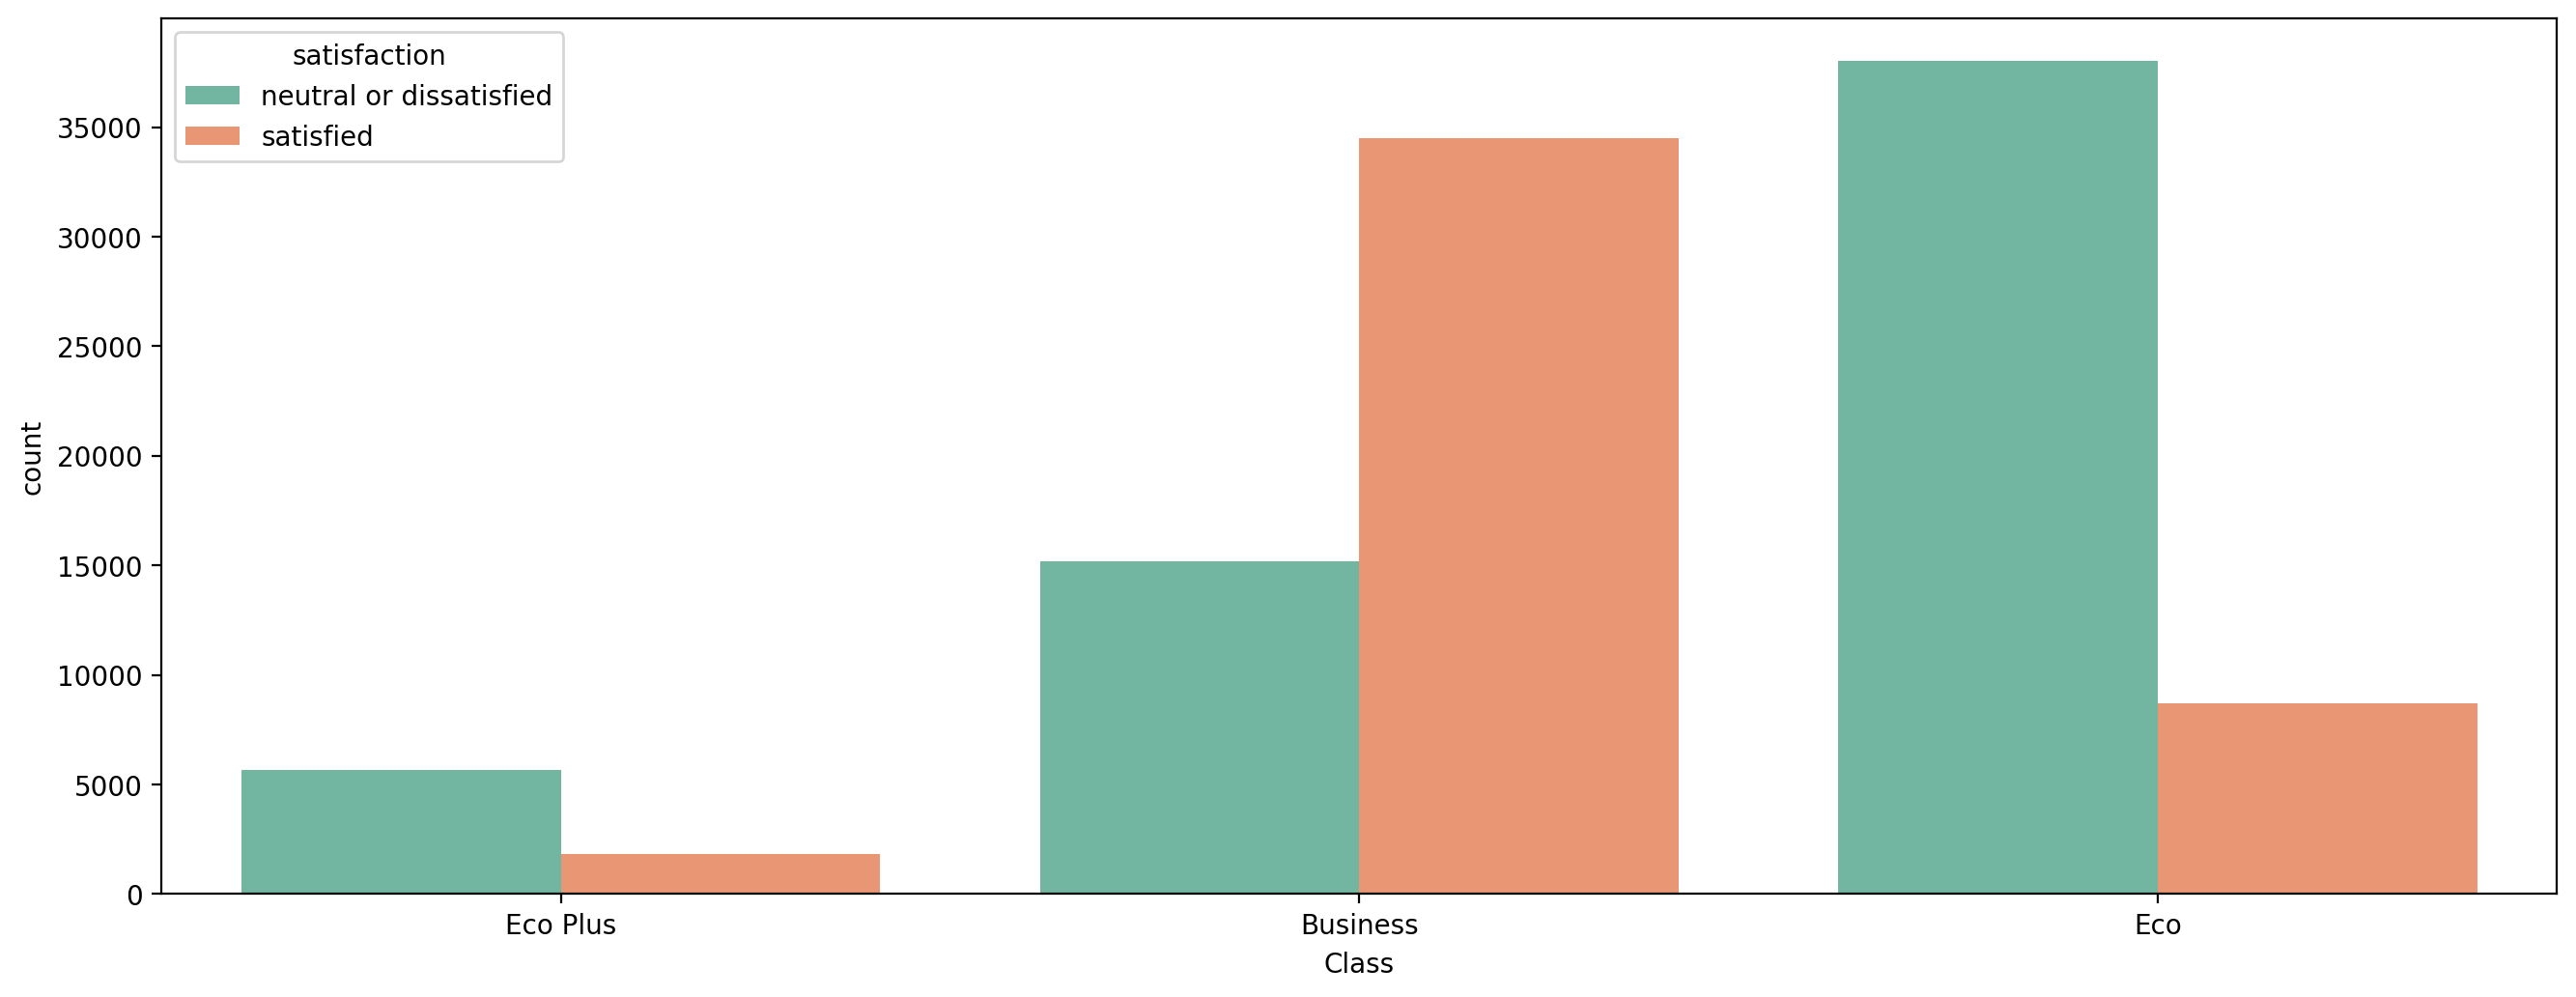

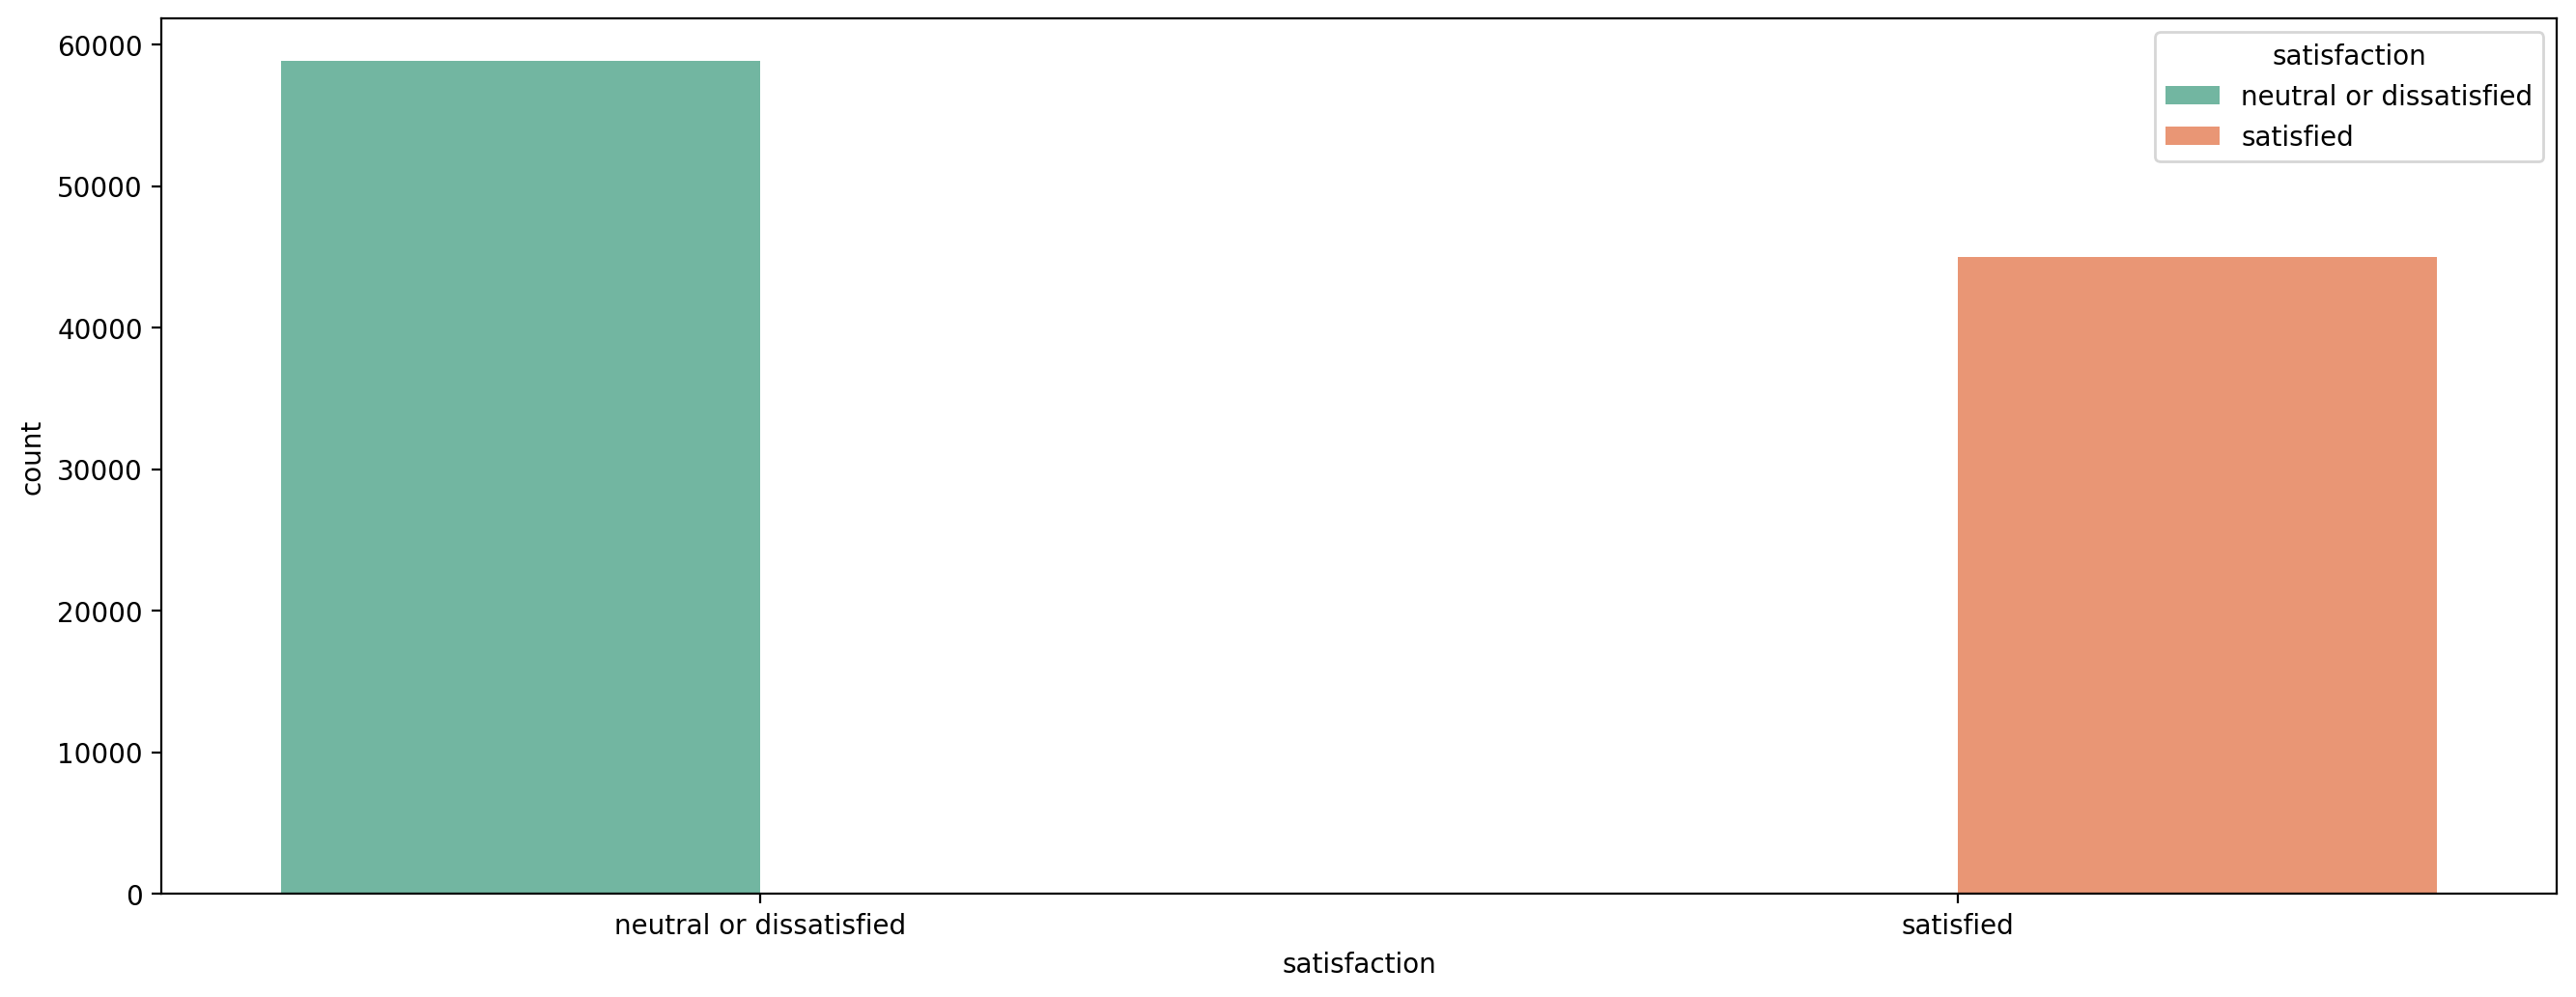

In [48]:
for col in df.select_dtypes(object):
    plt.figure(figsize = (16,6),dpi =200)
    sns.countplot(data=df,x = col,hue = df['satisfaction'],palette = 'Set2')

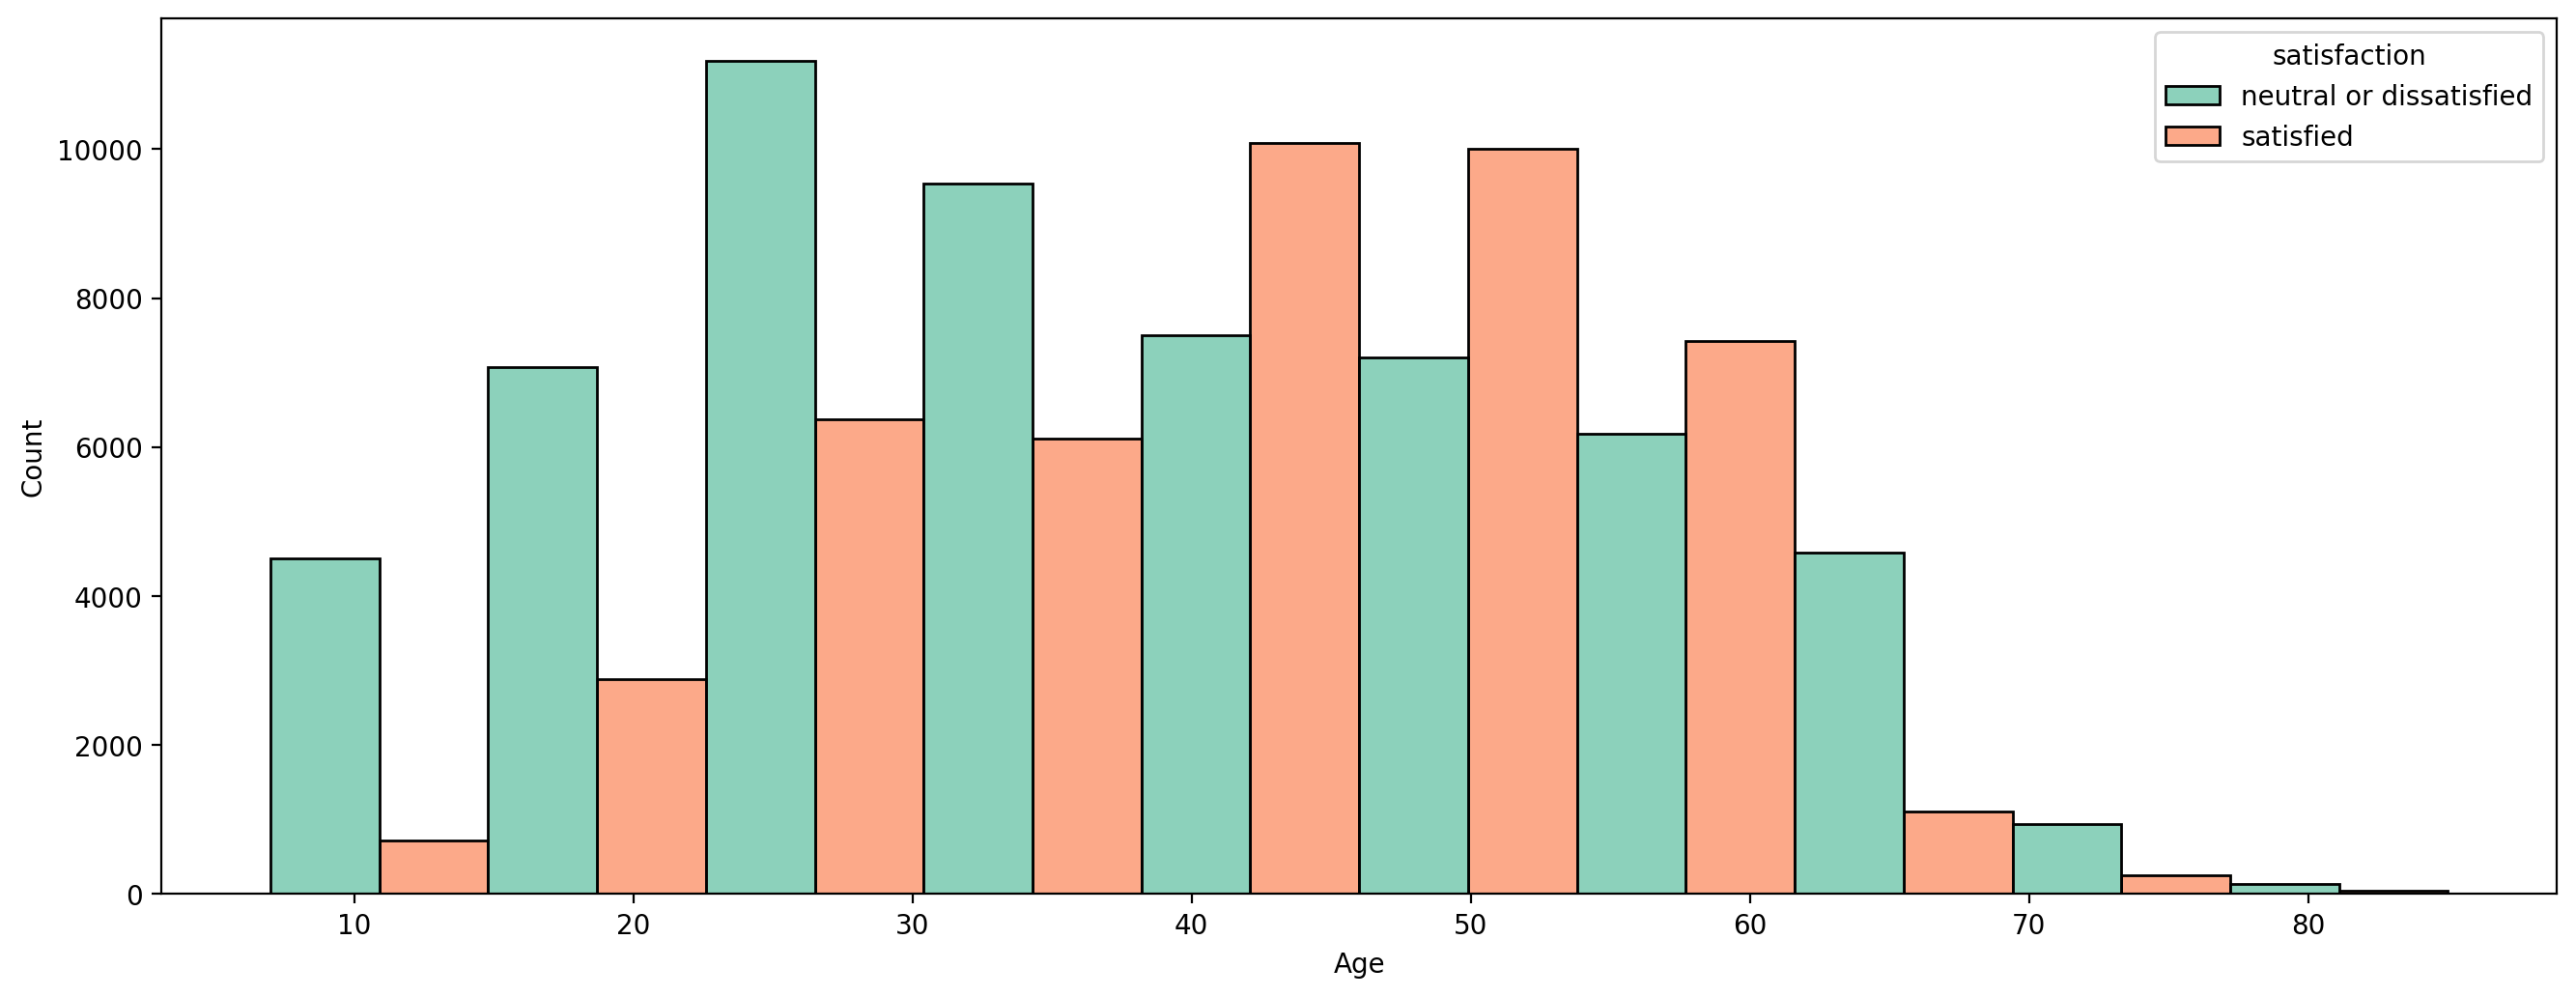

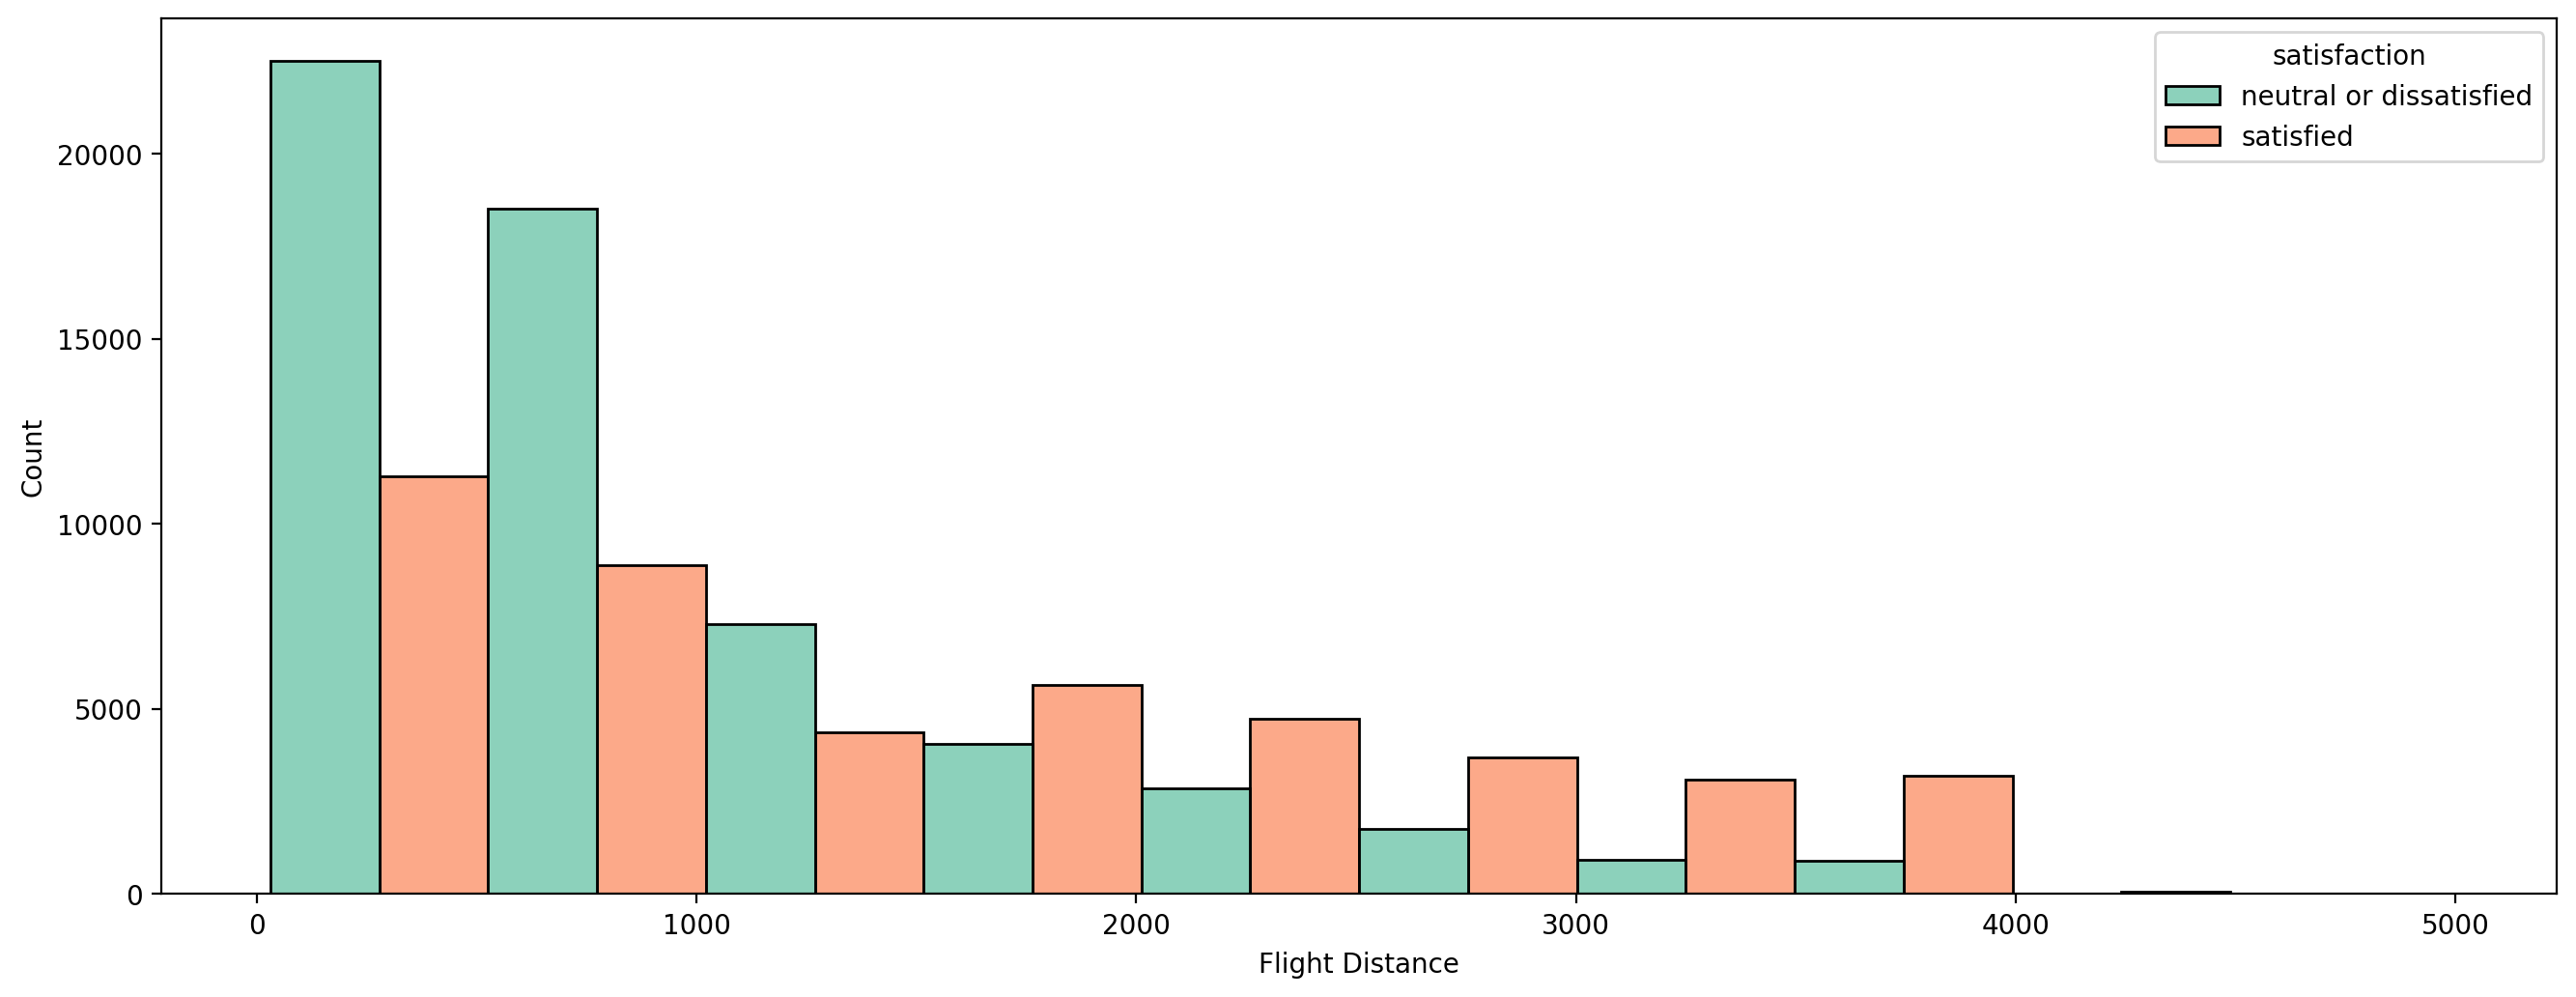

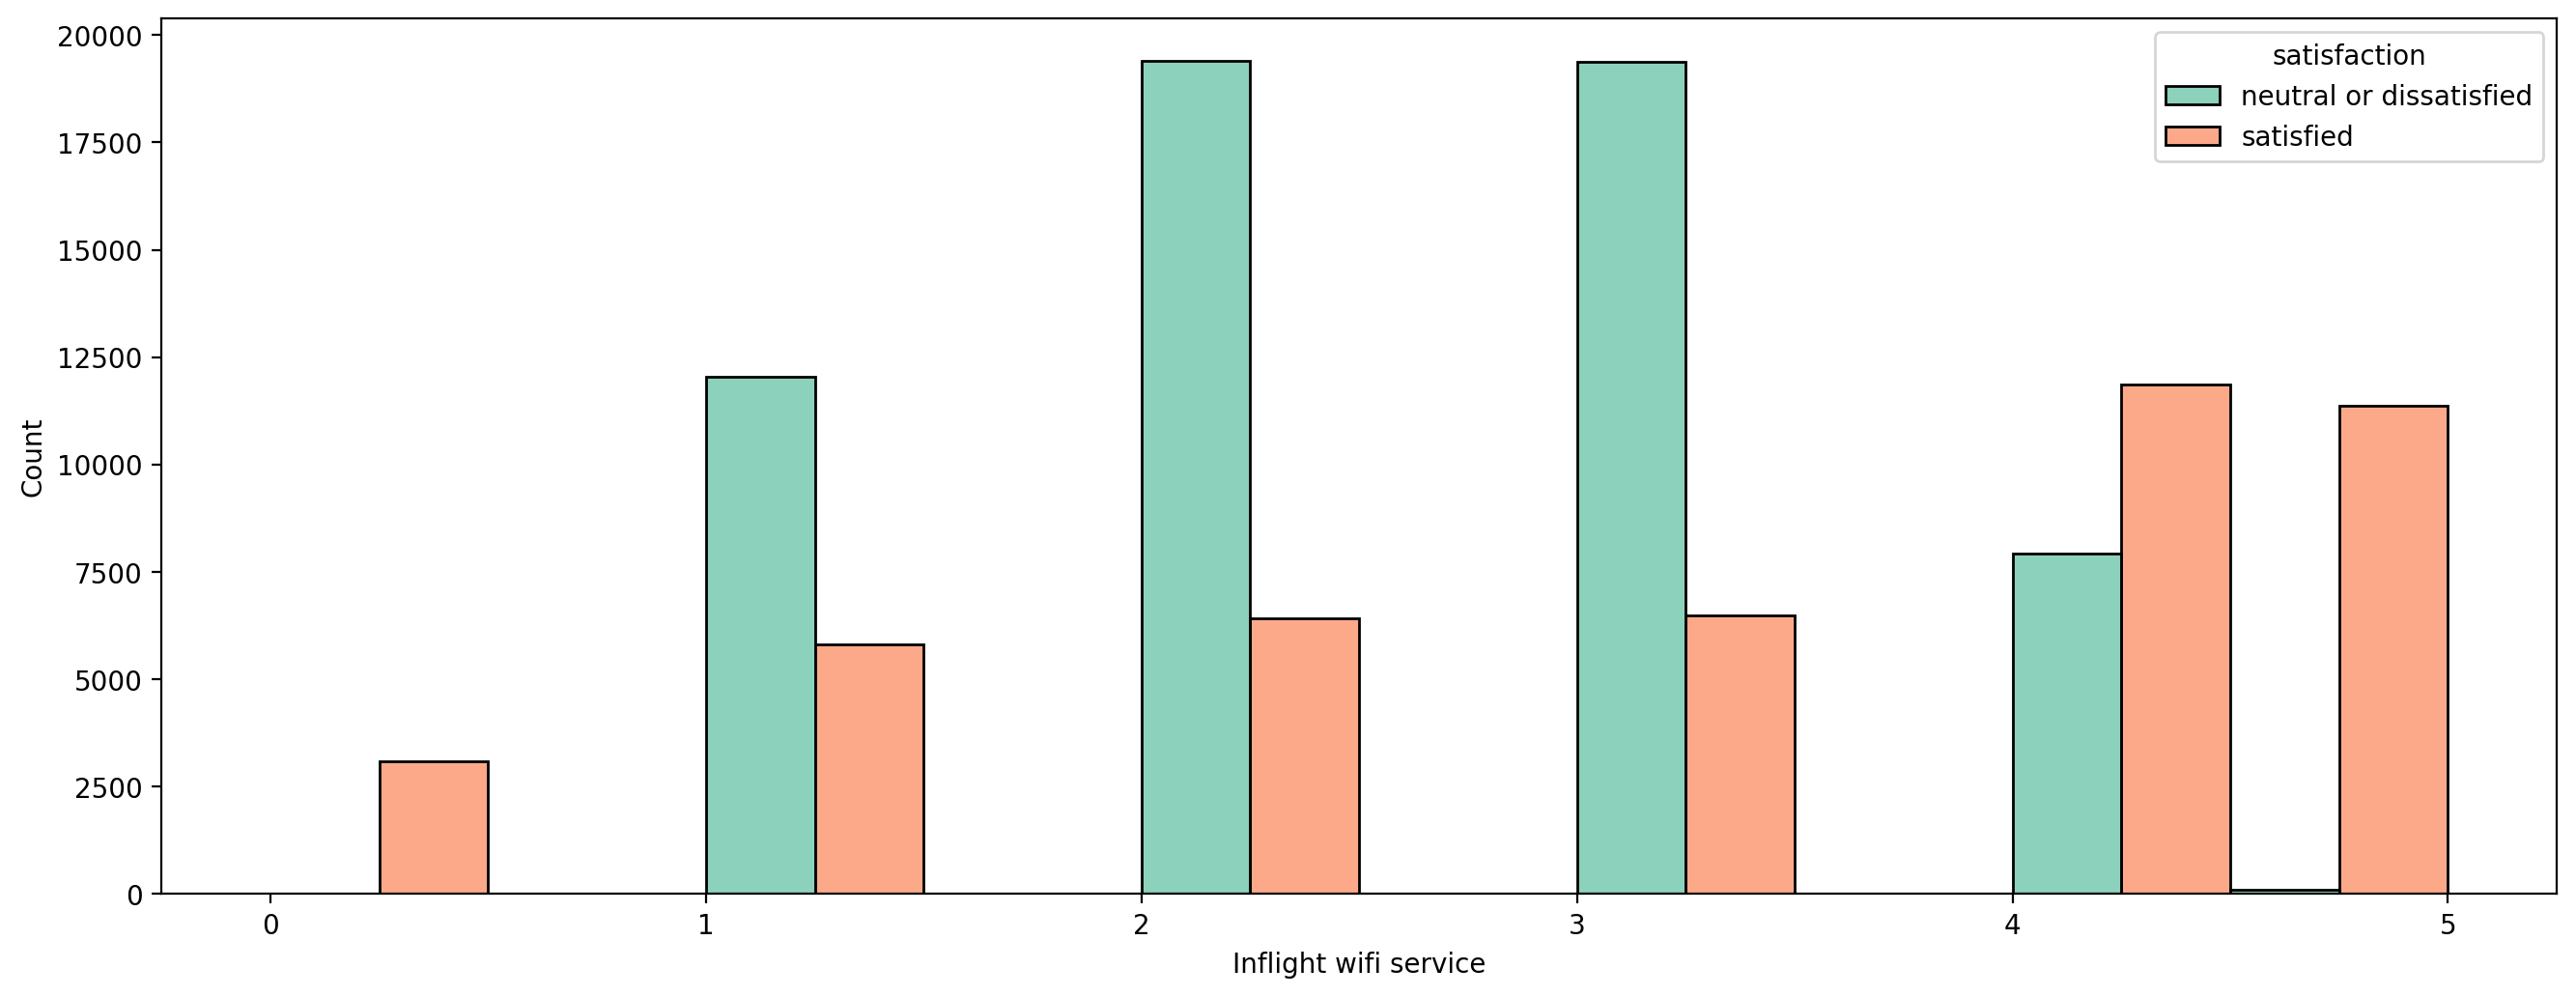

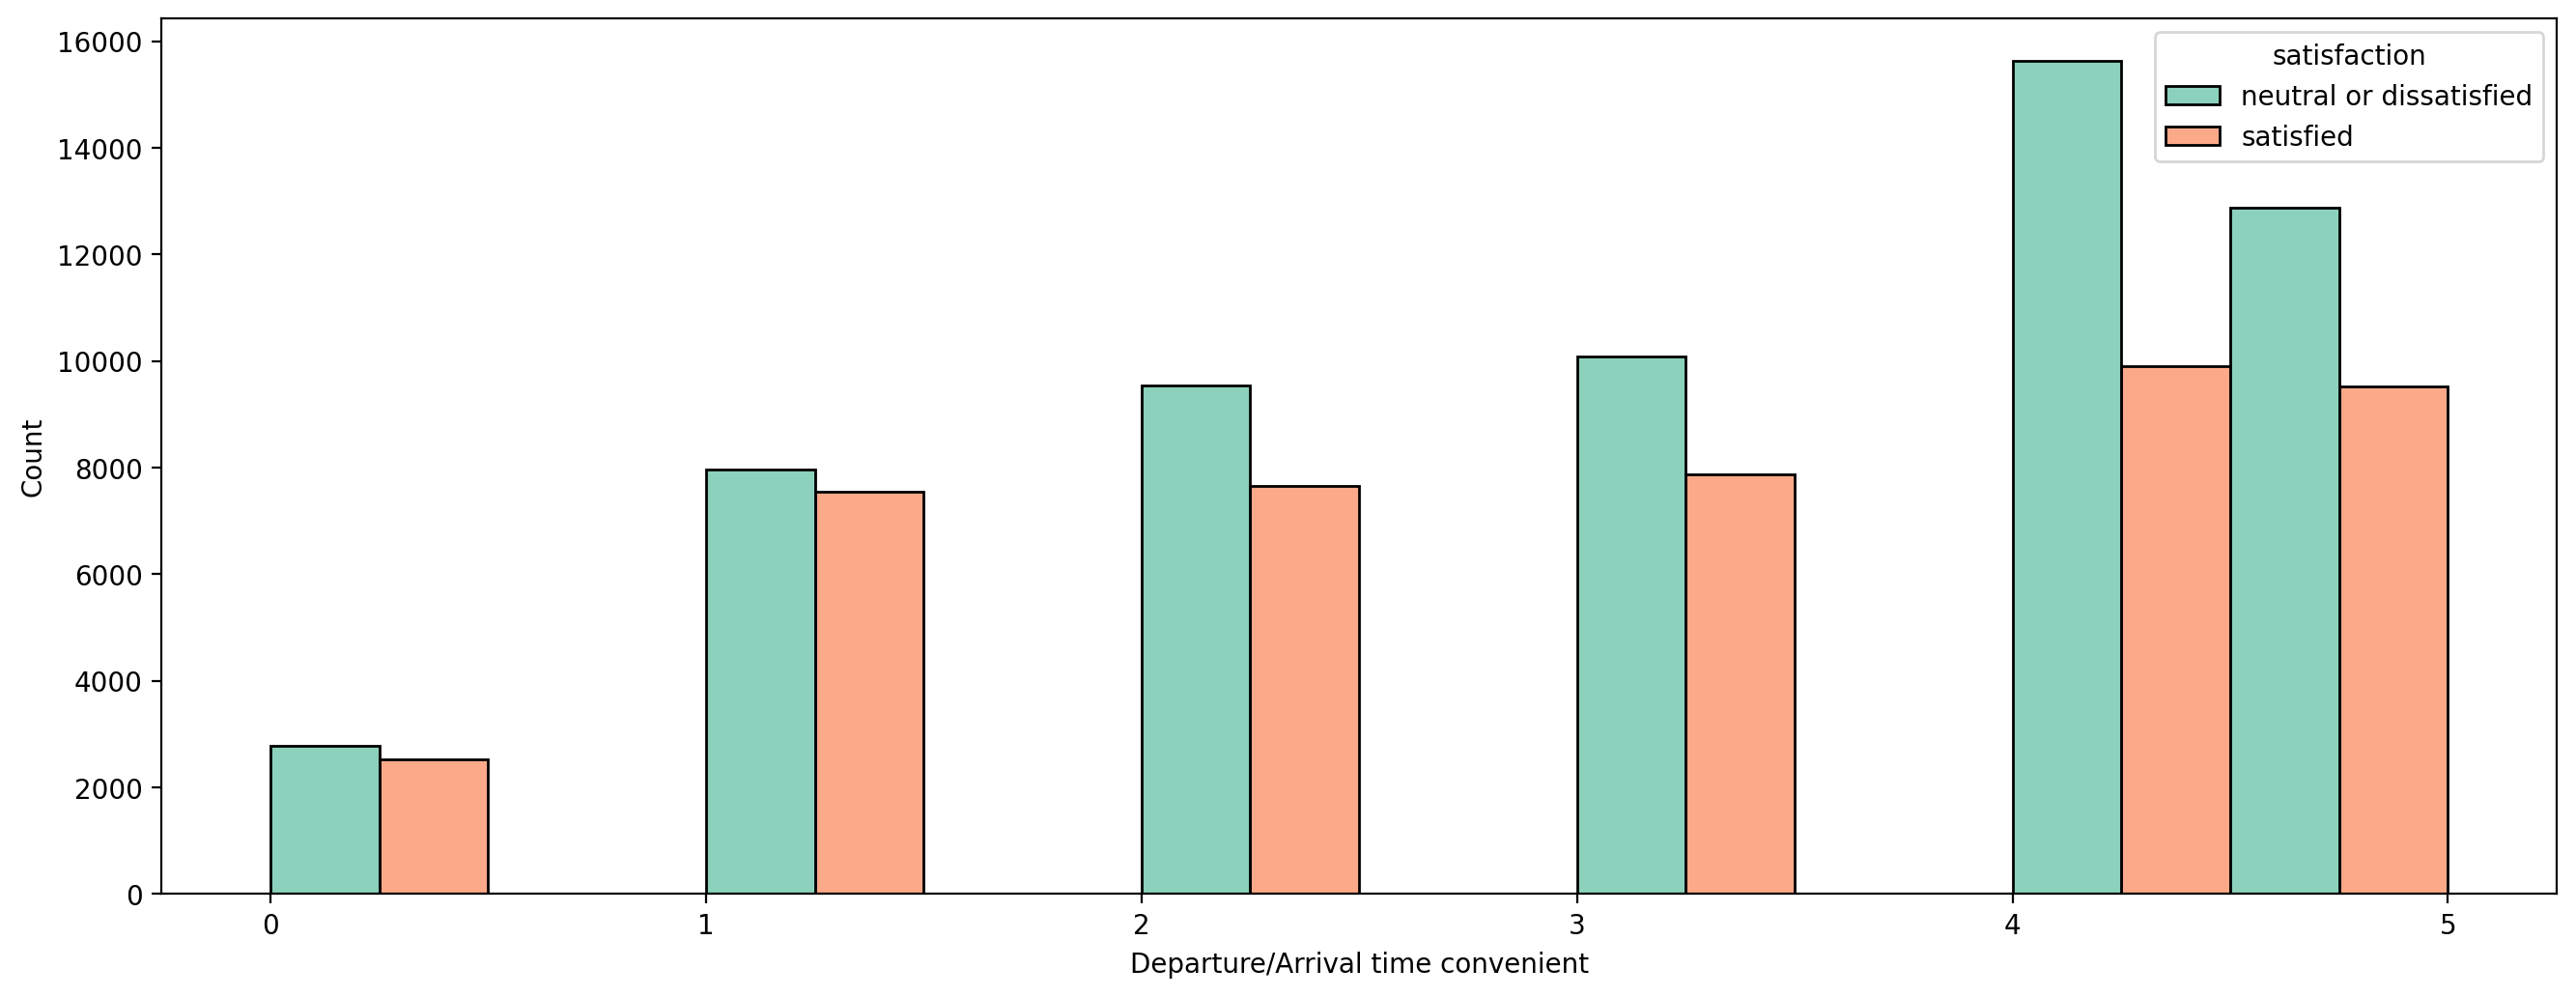

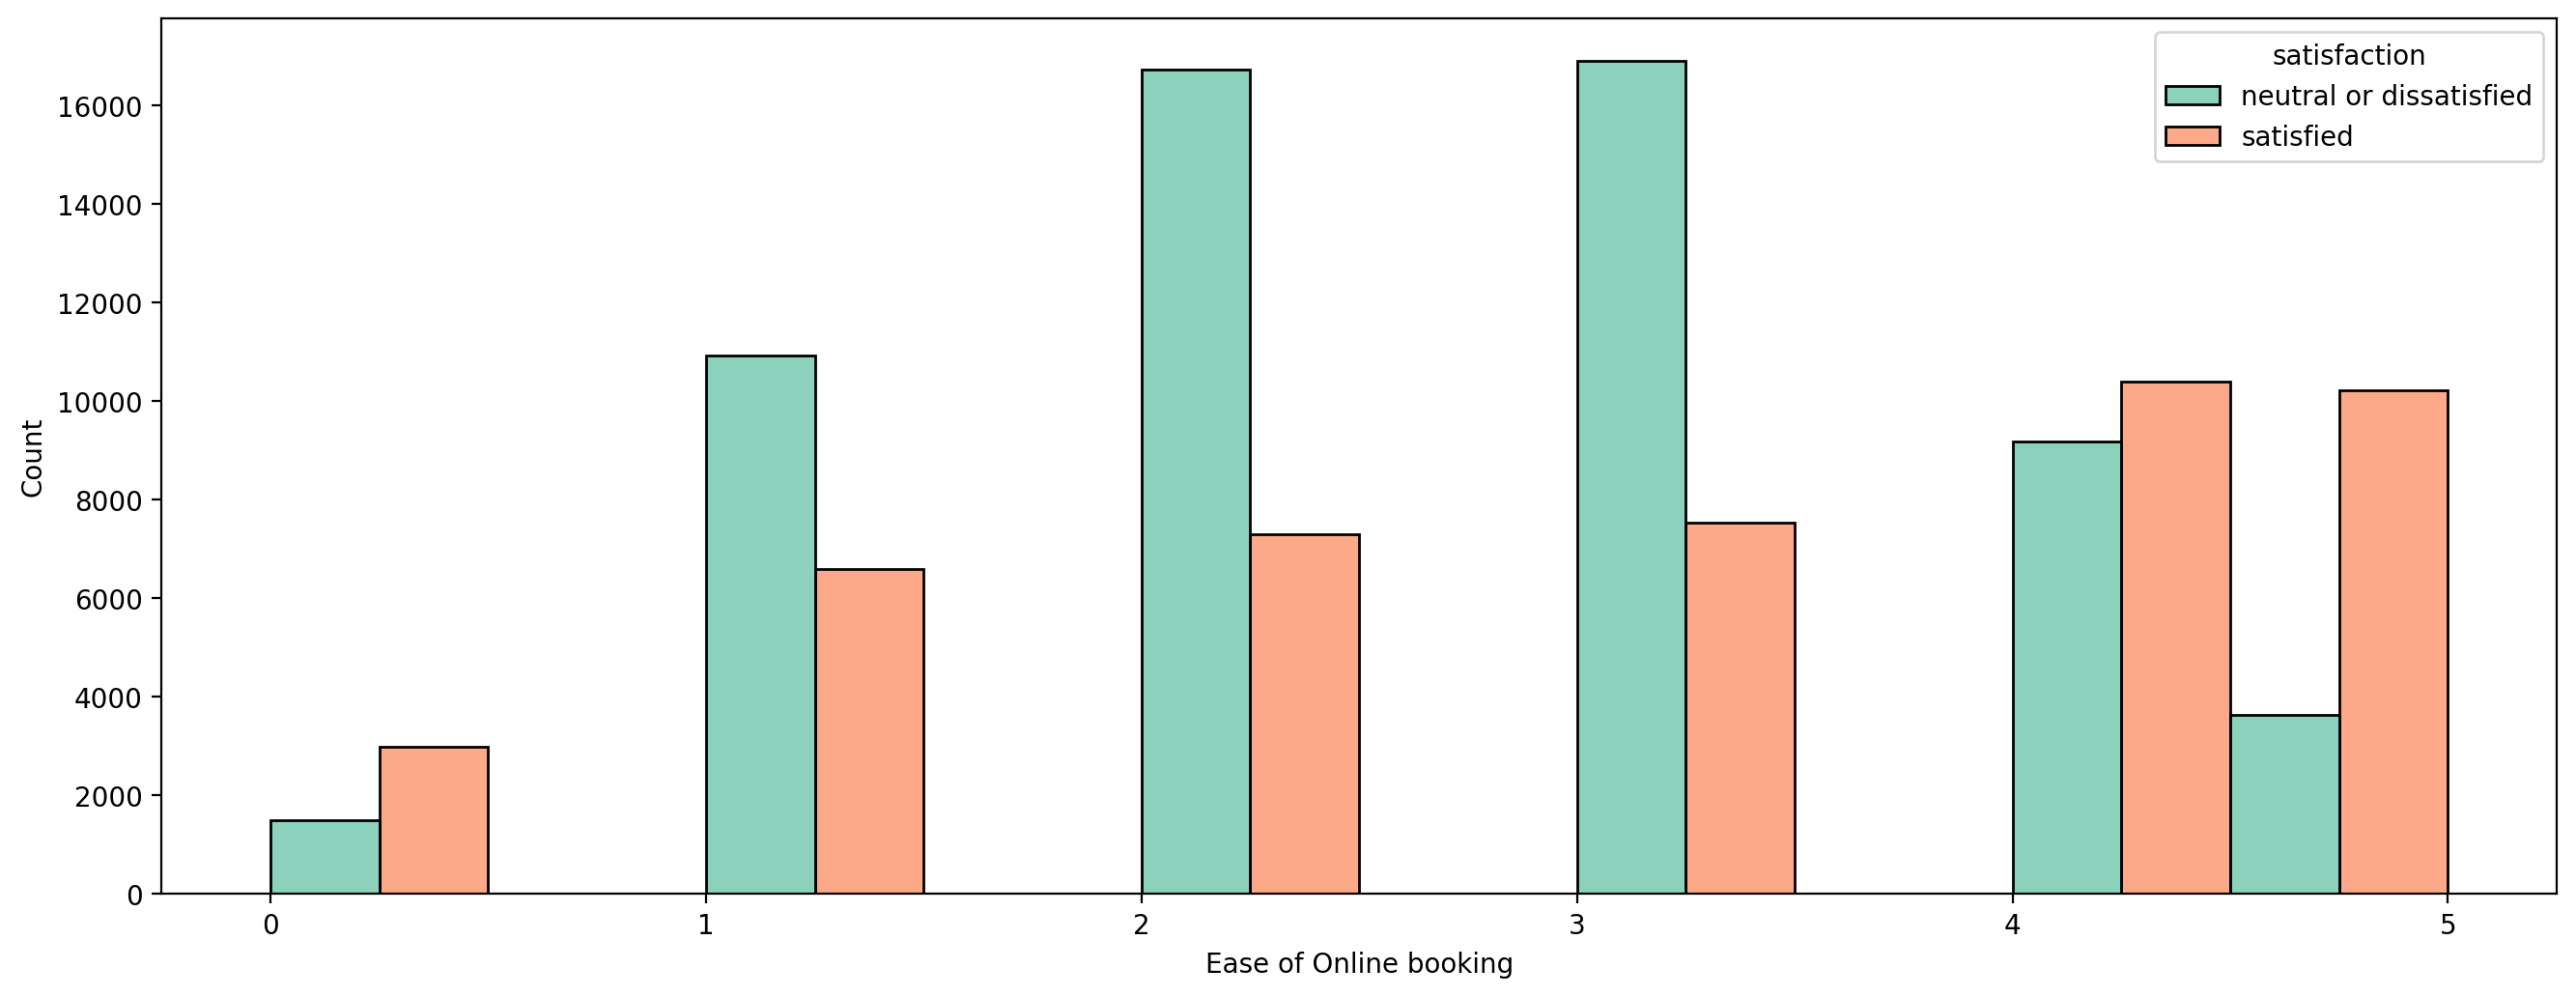

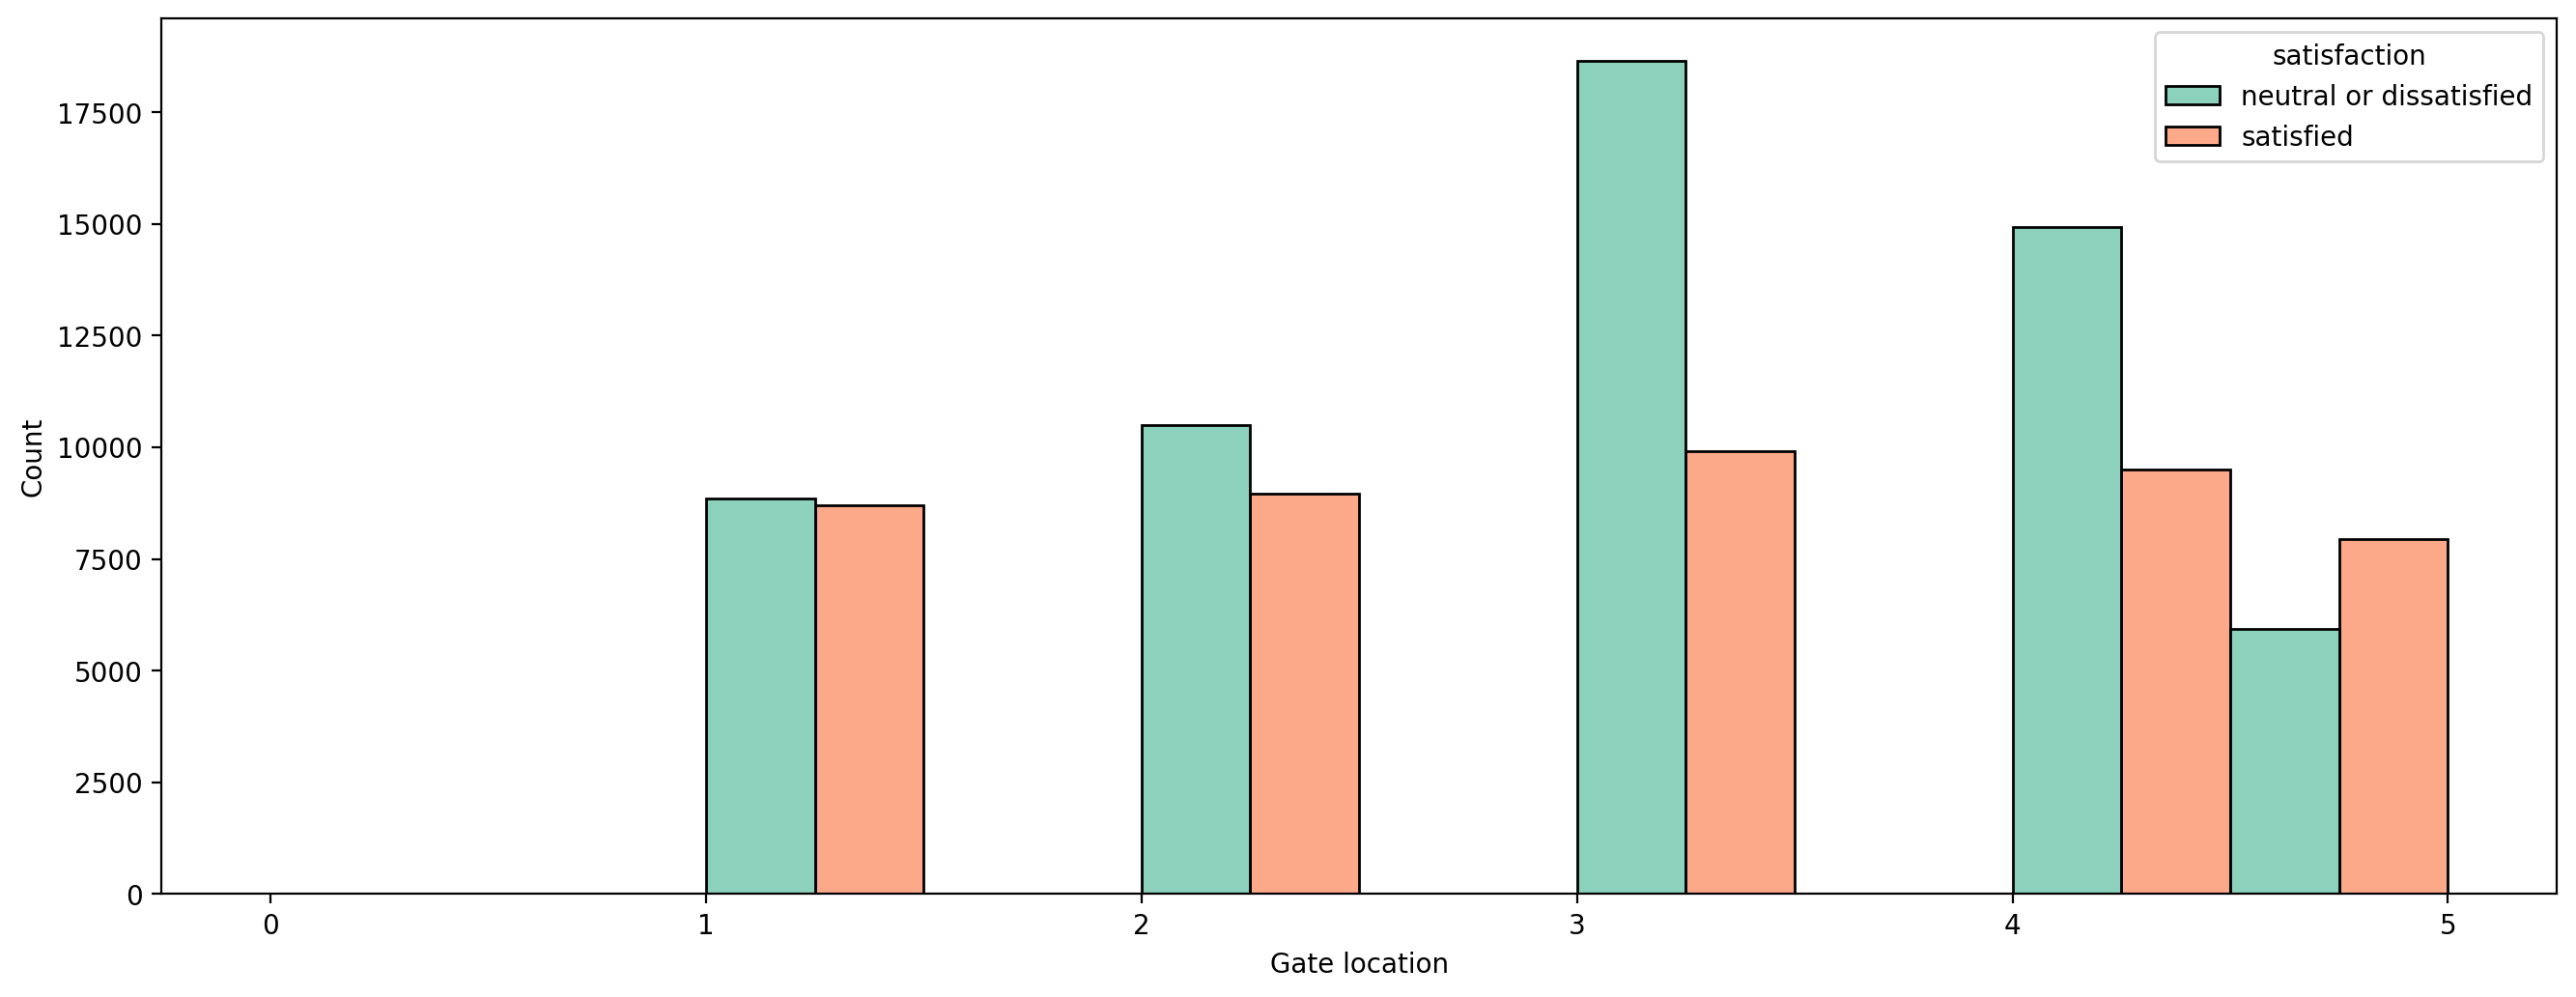

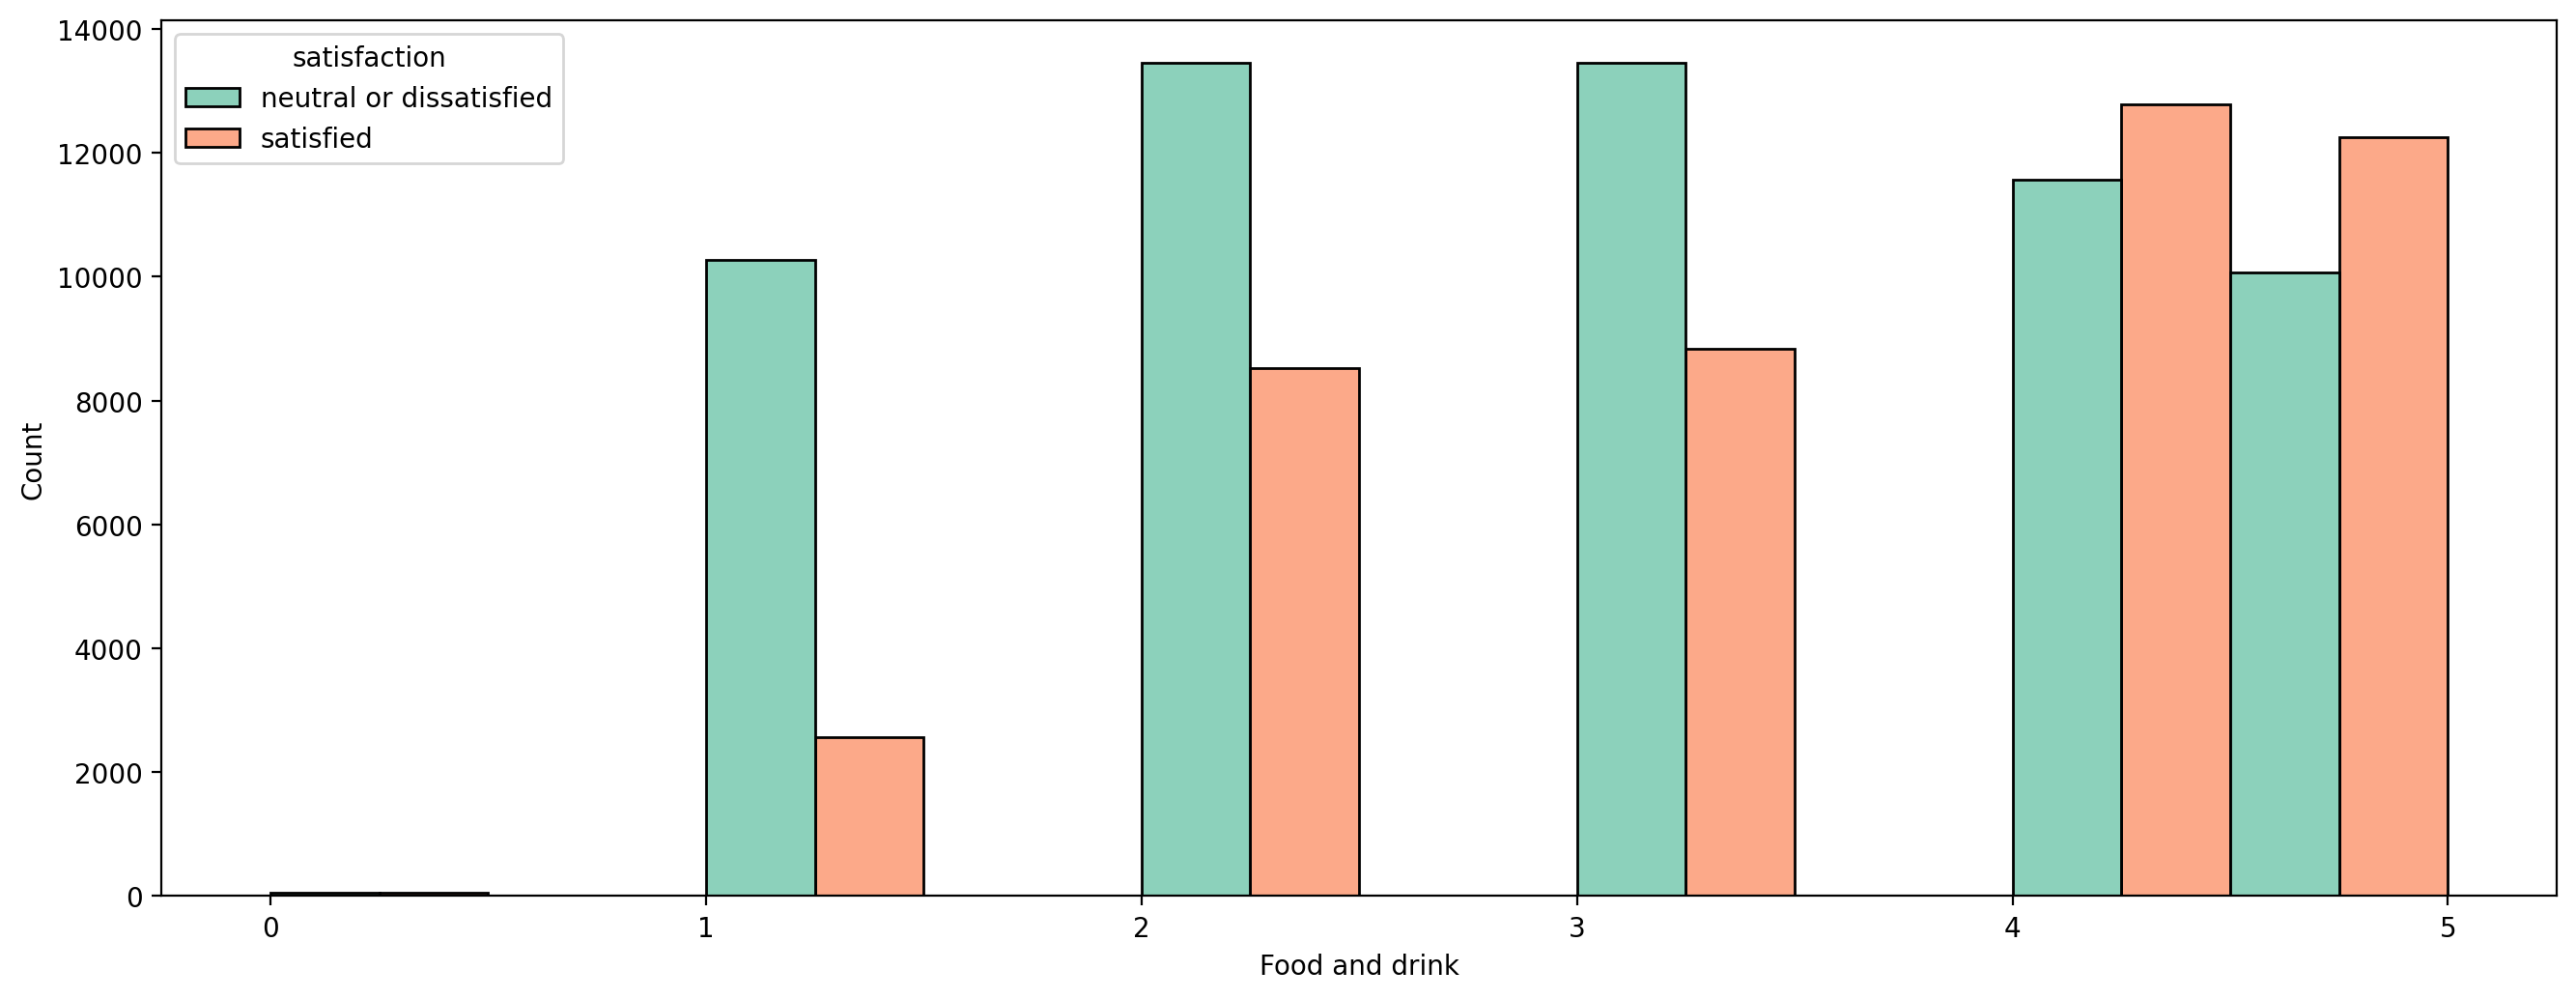

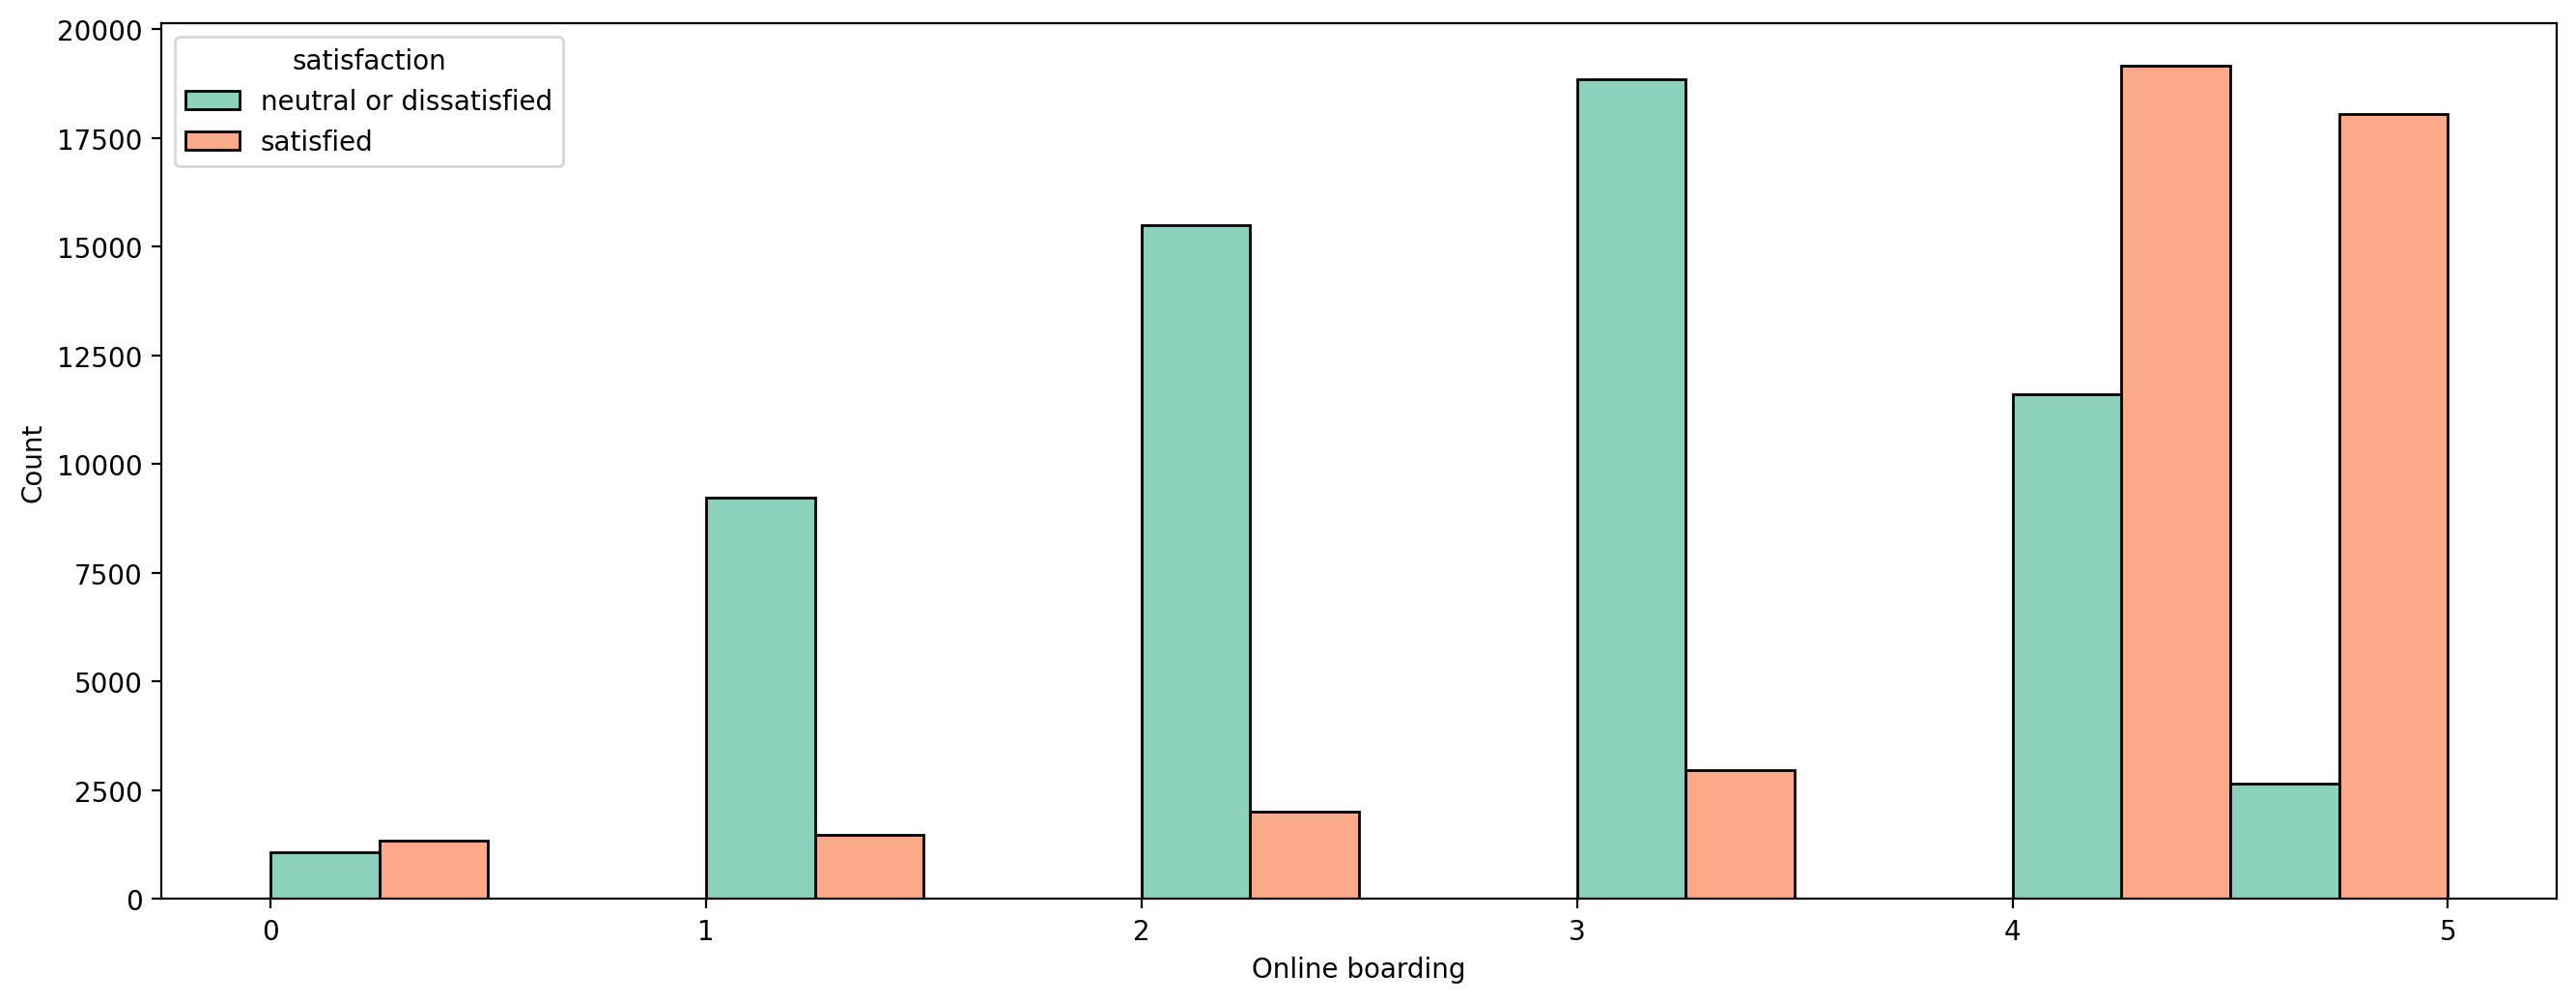

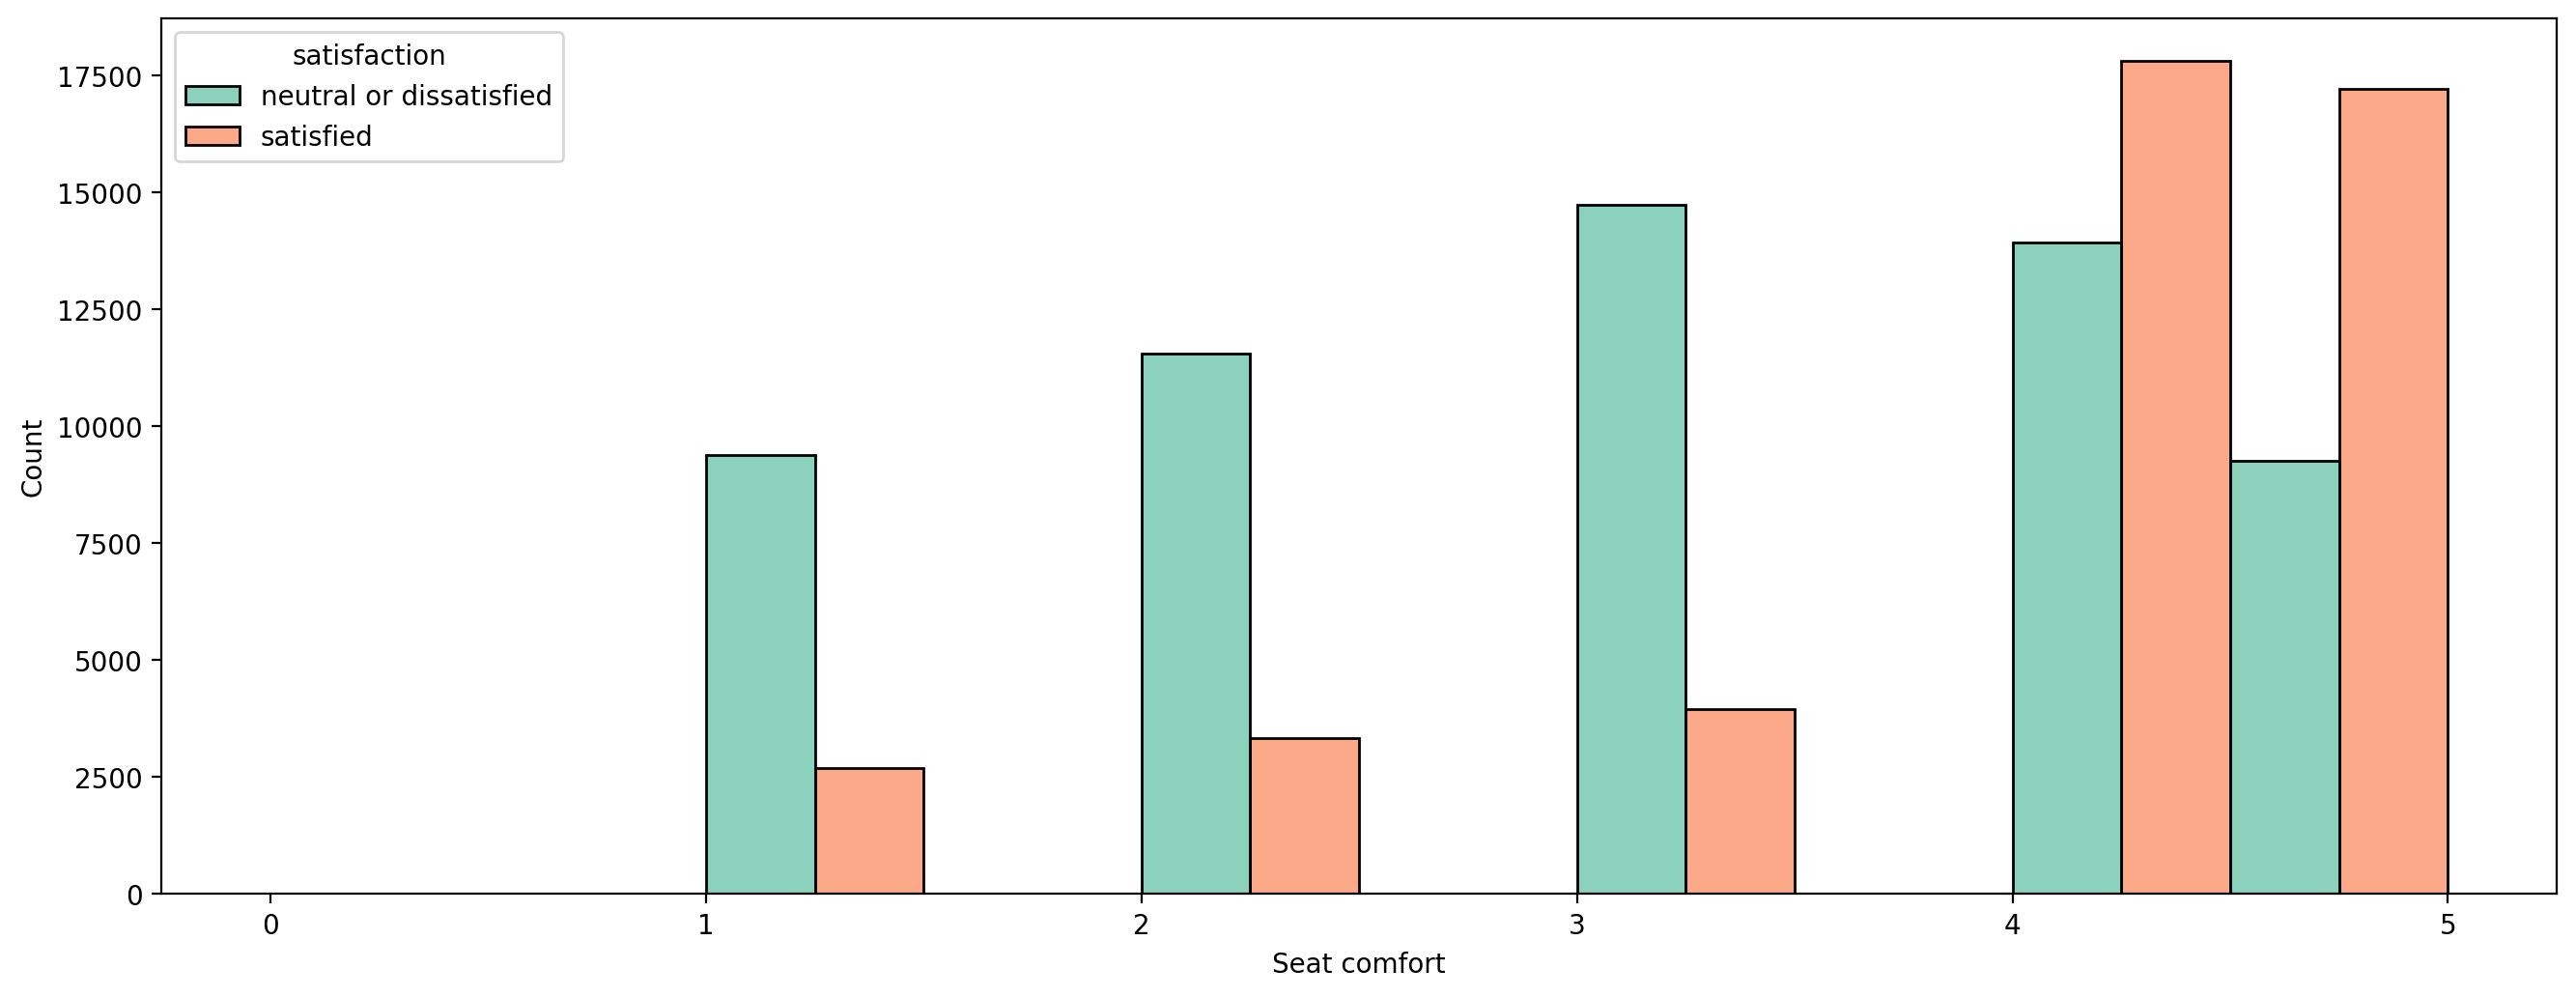

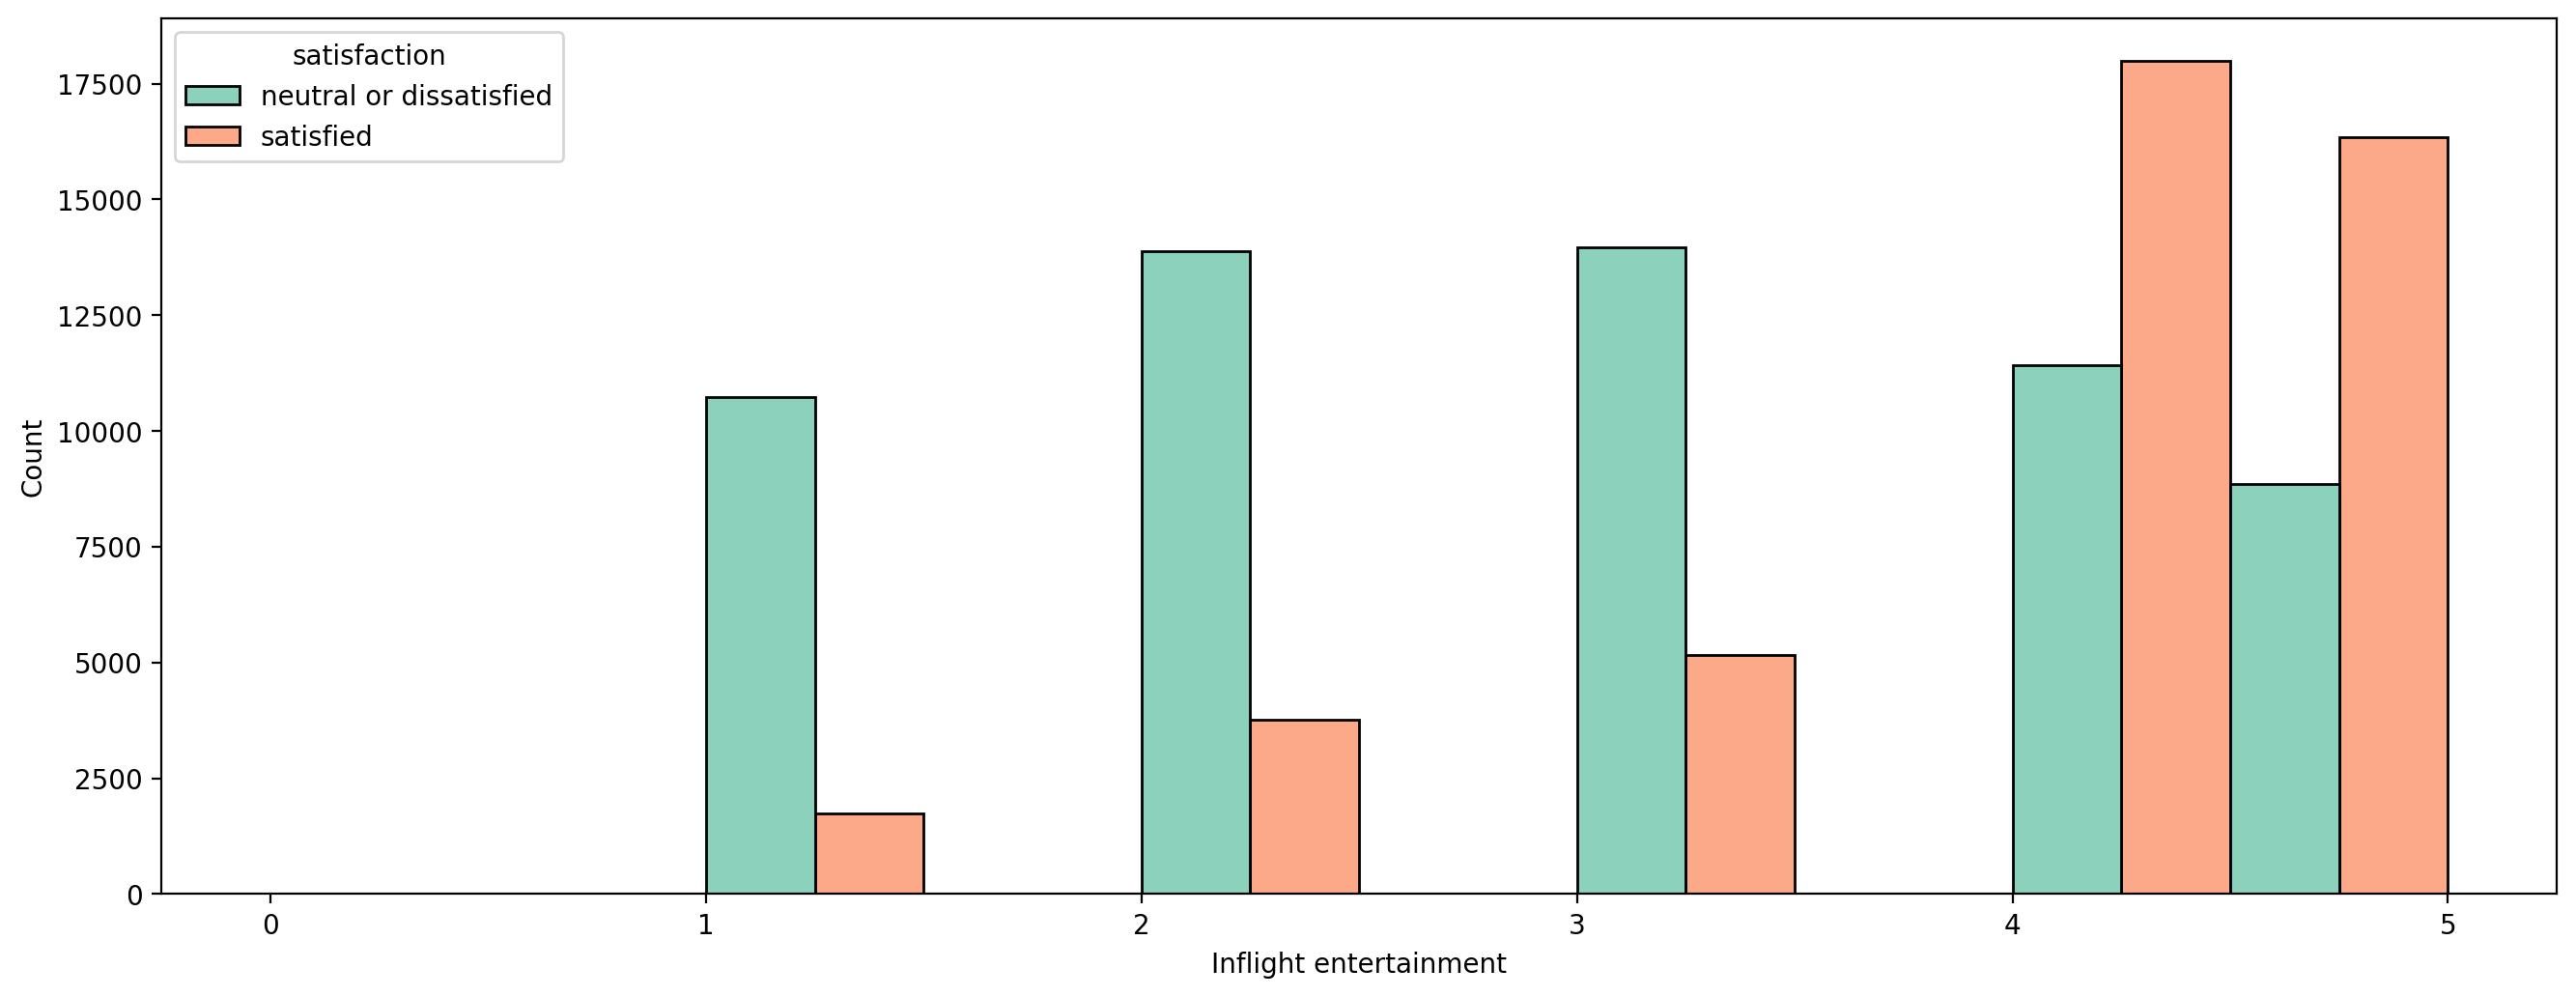

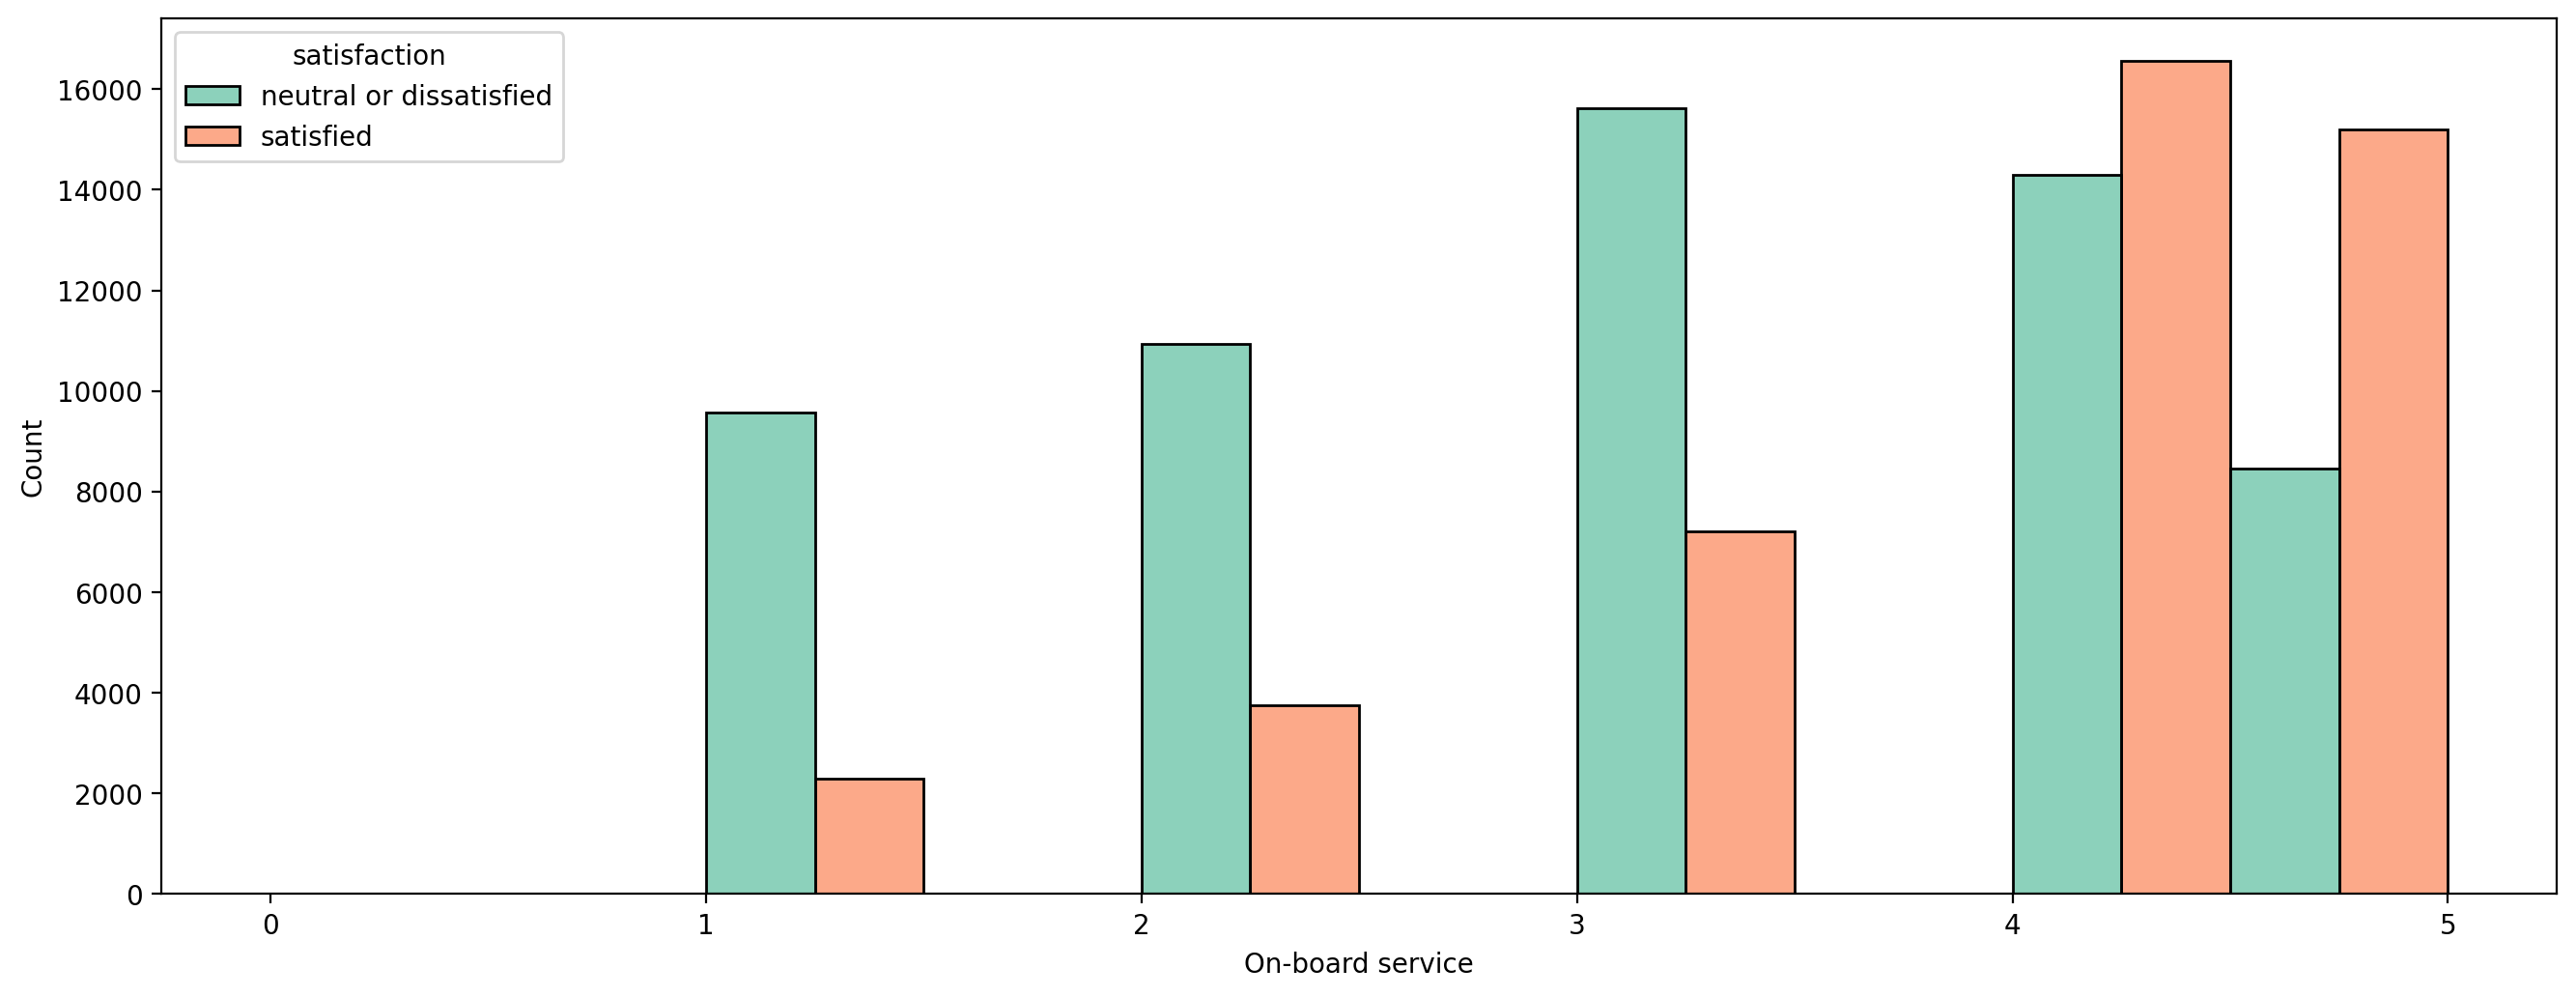

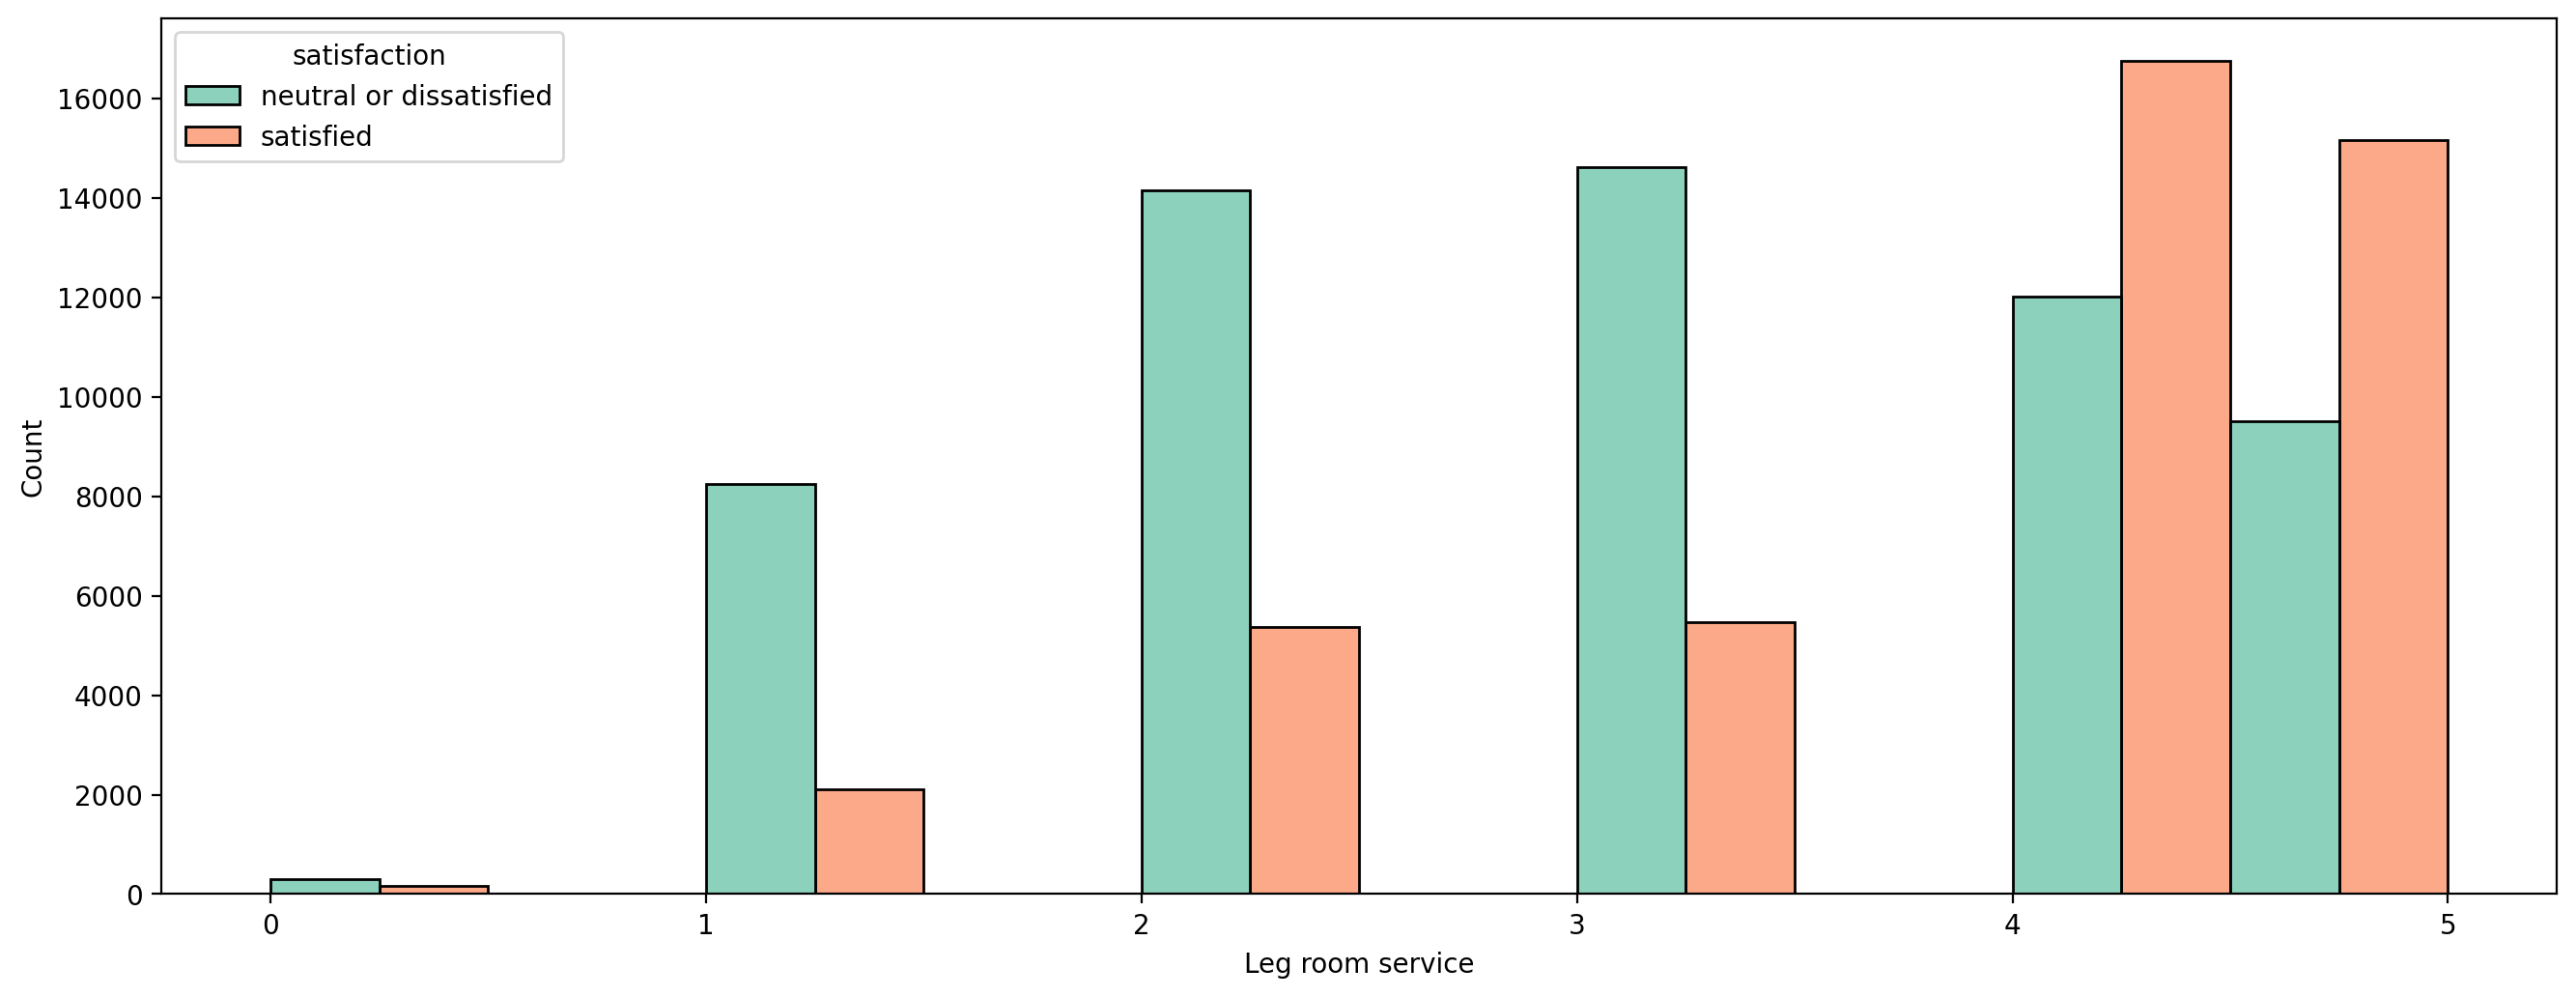

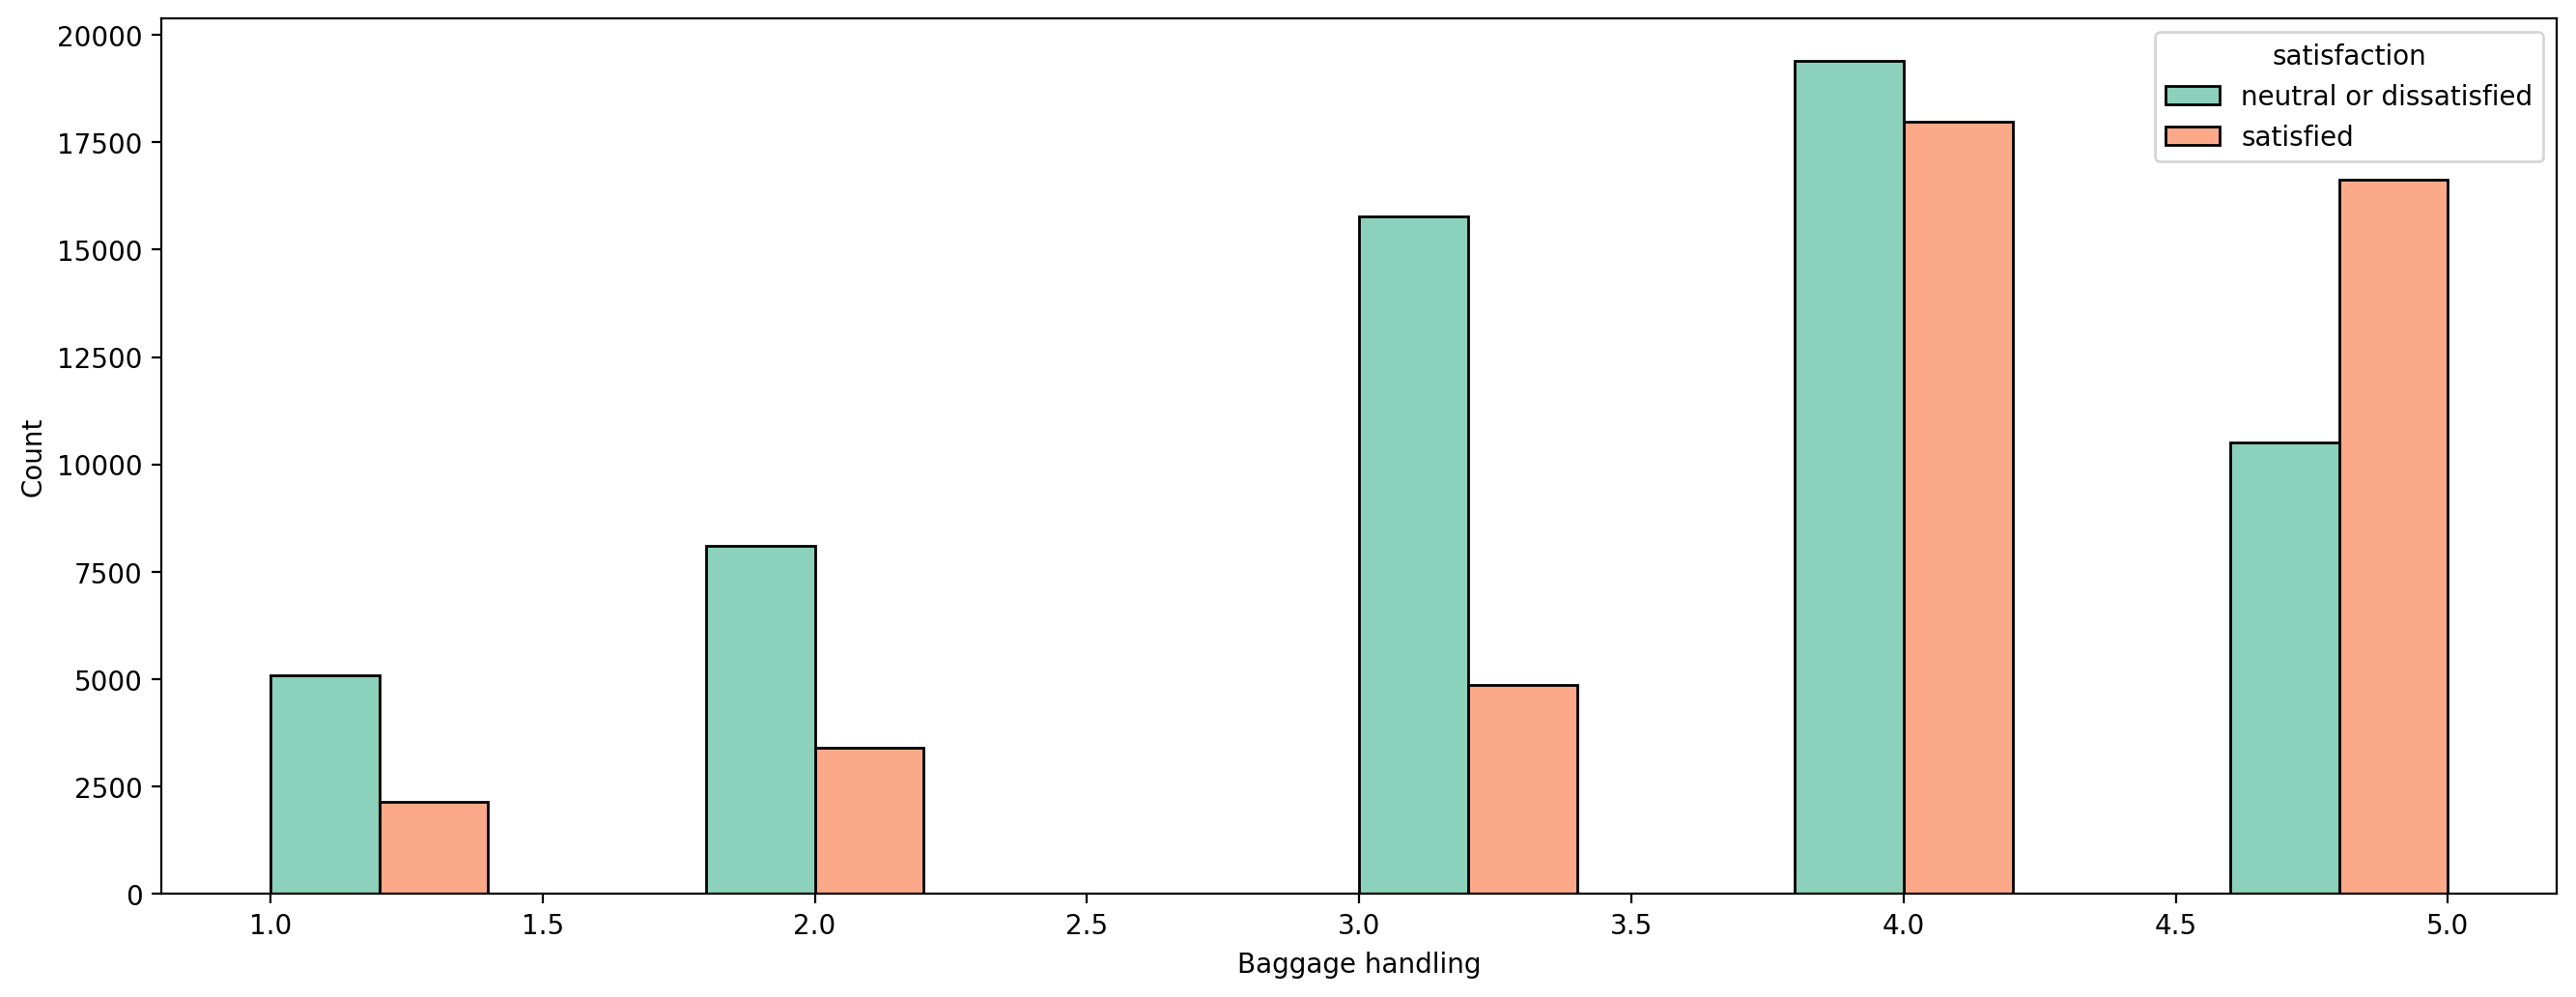

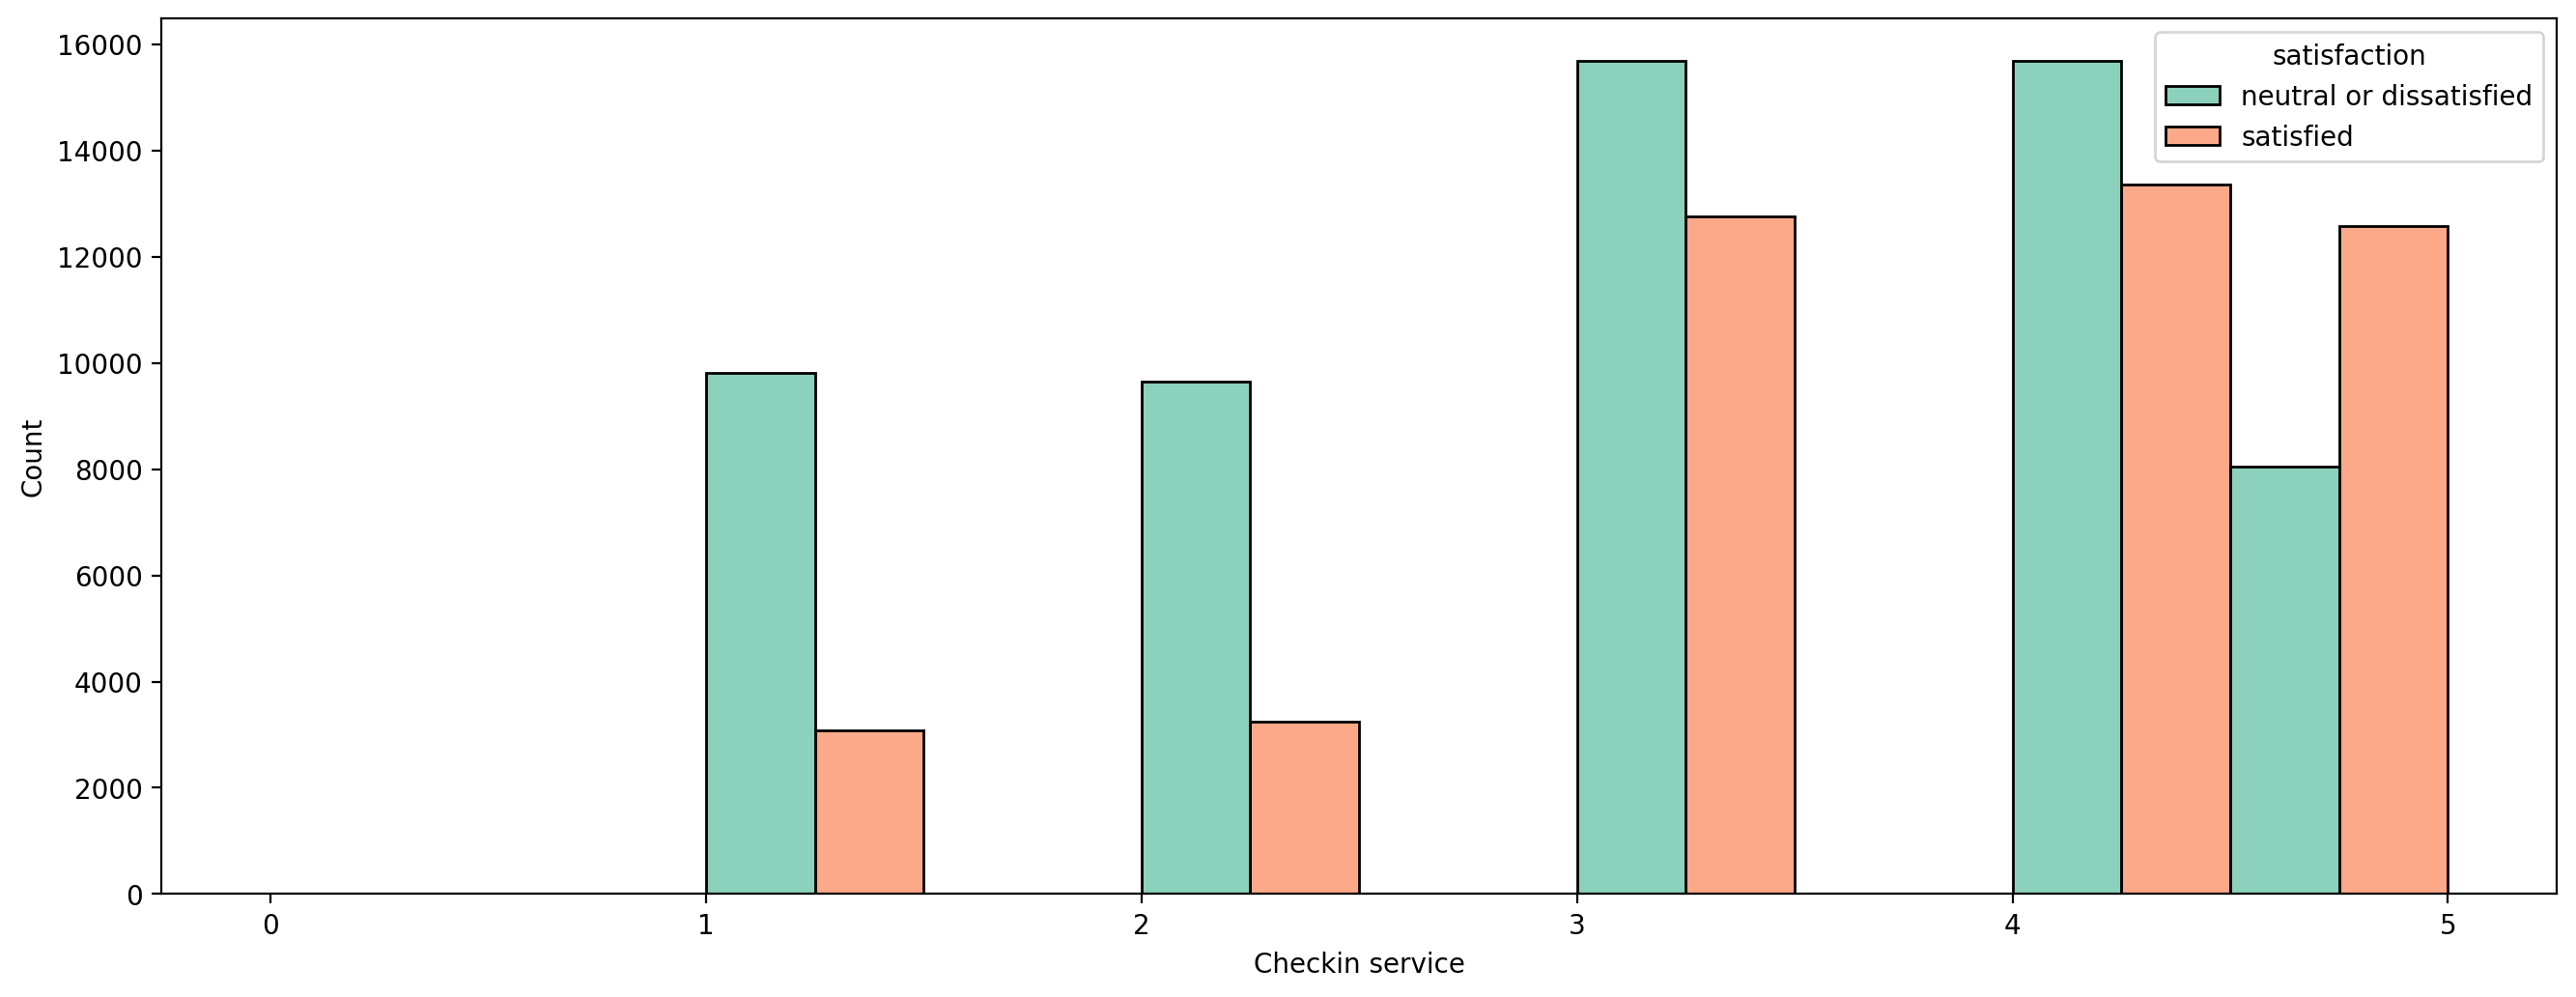

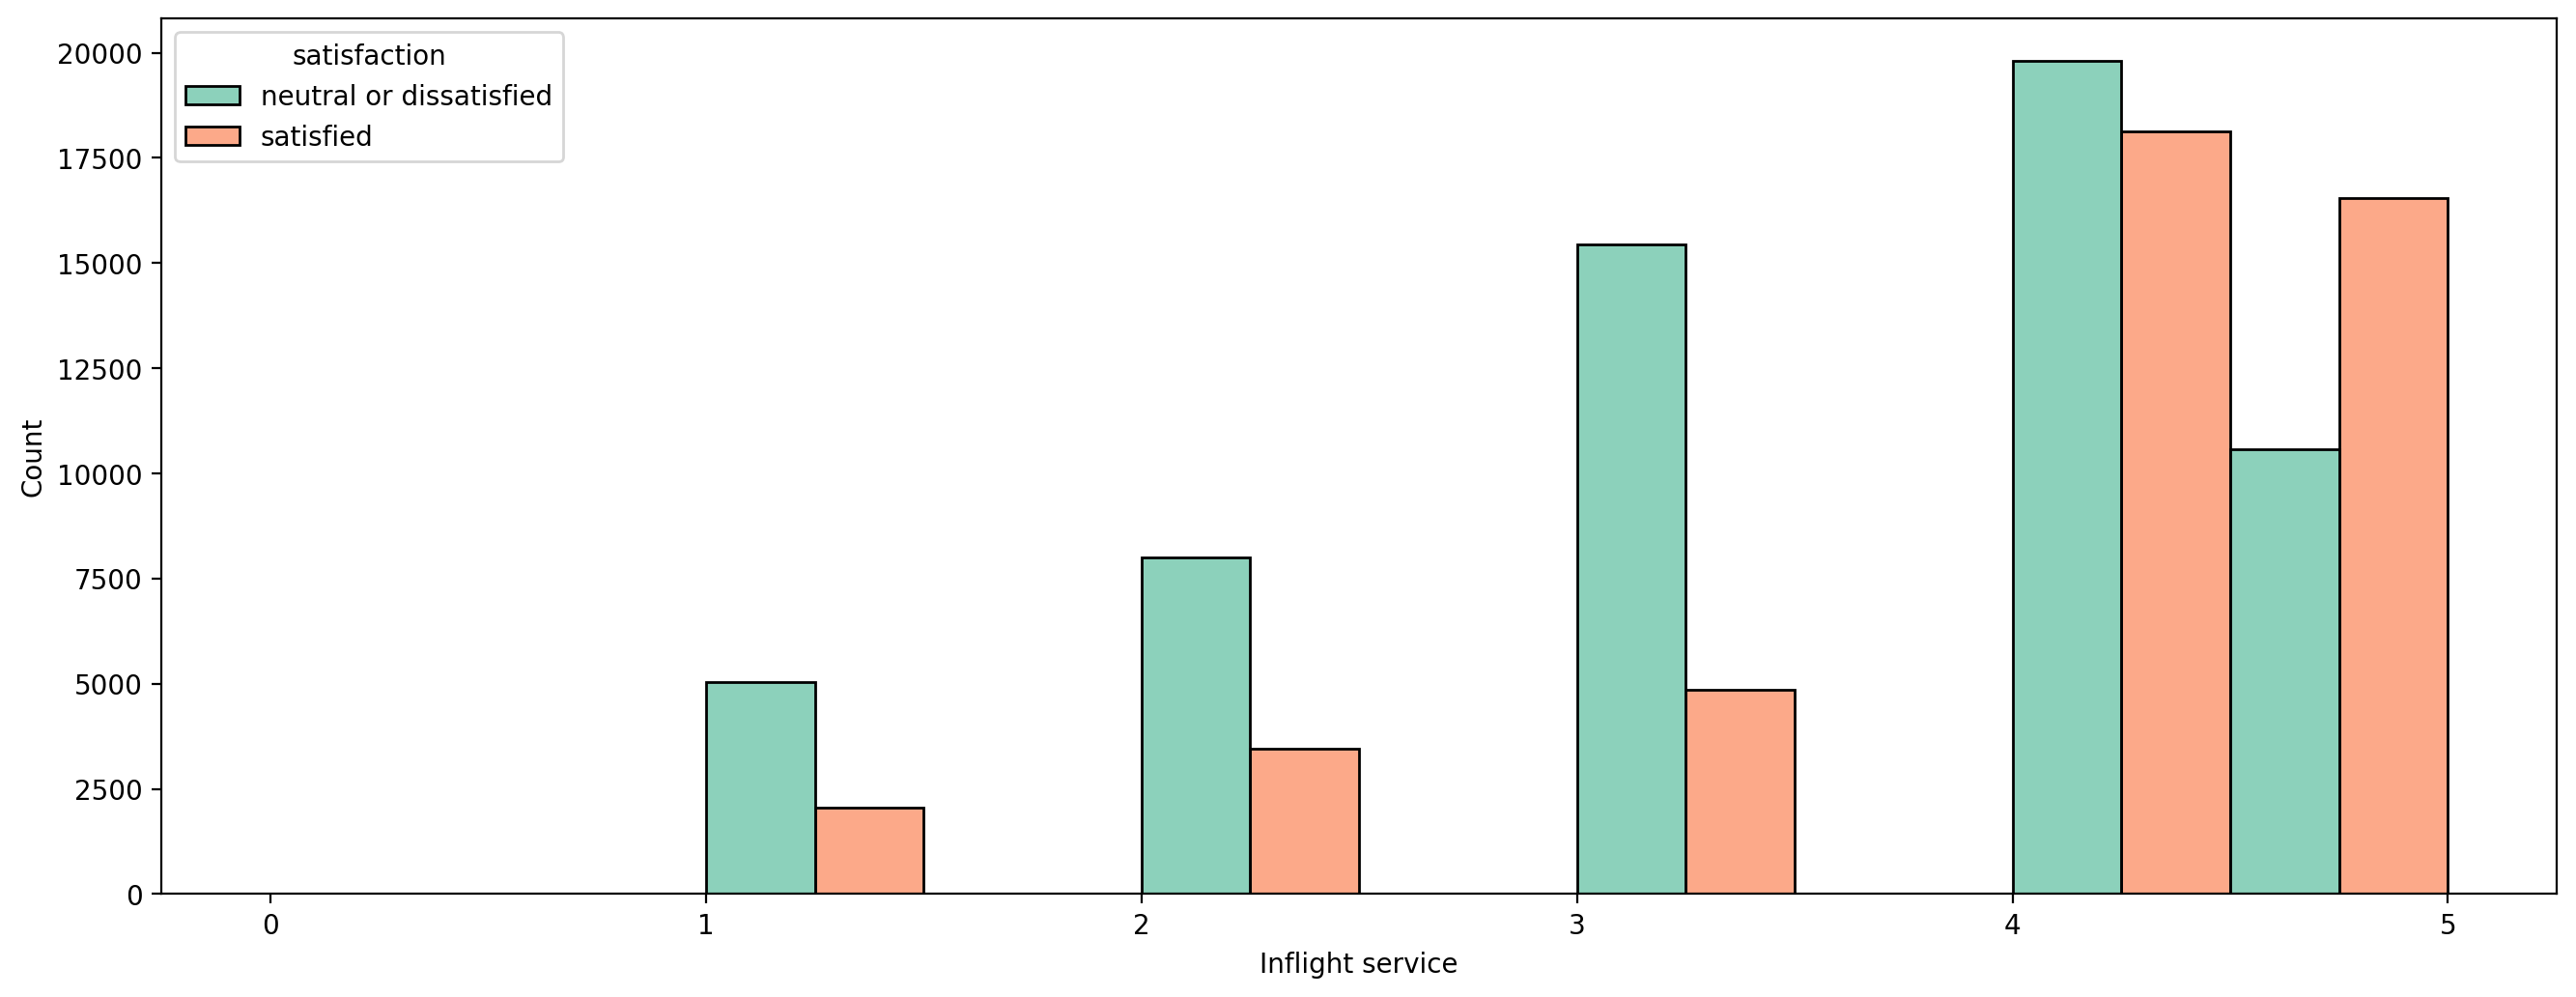

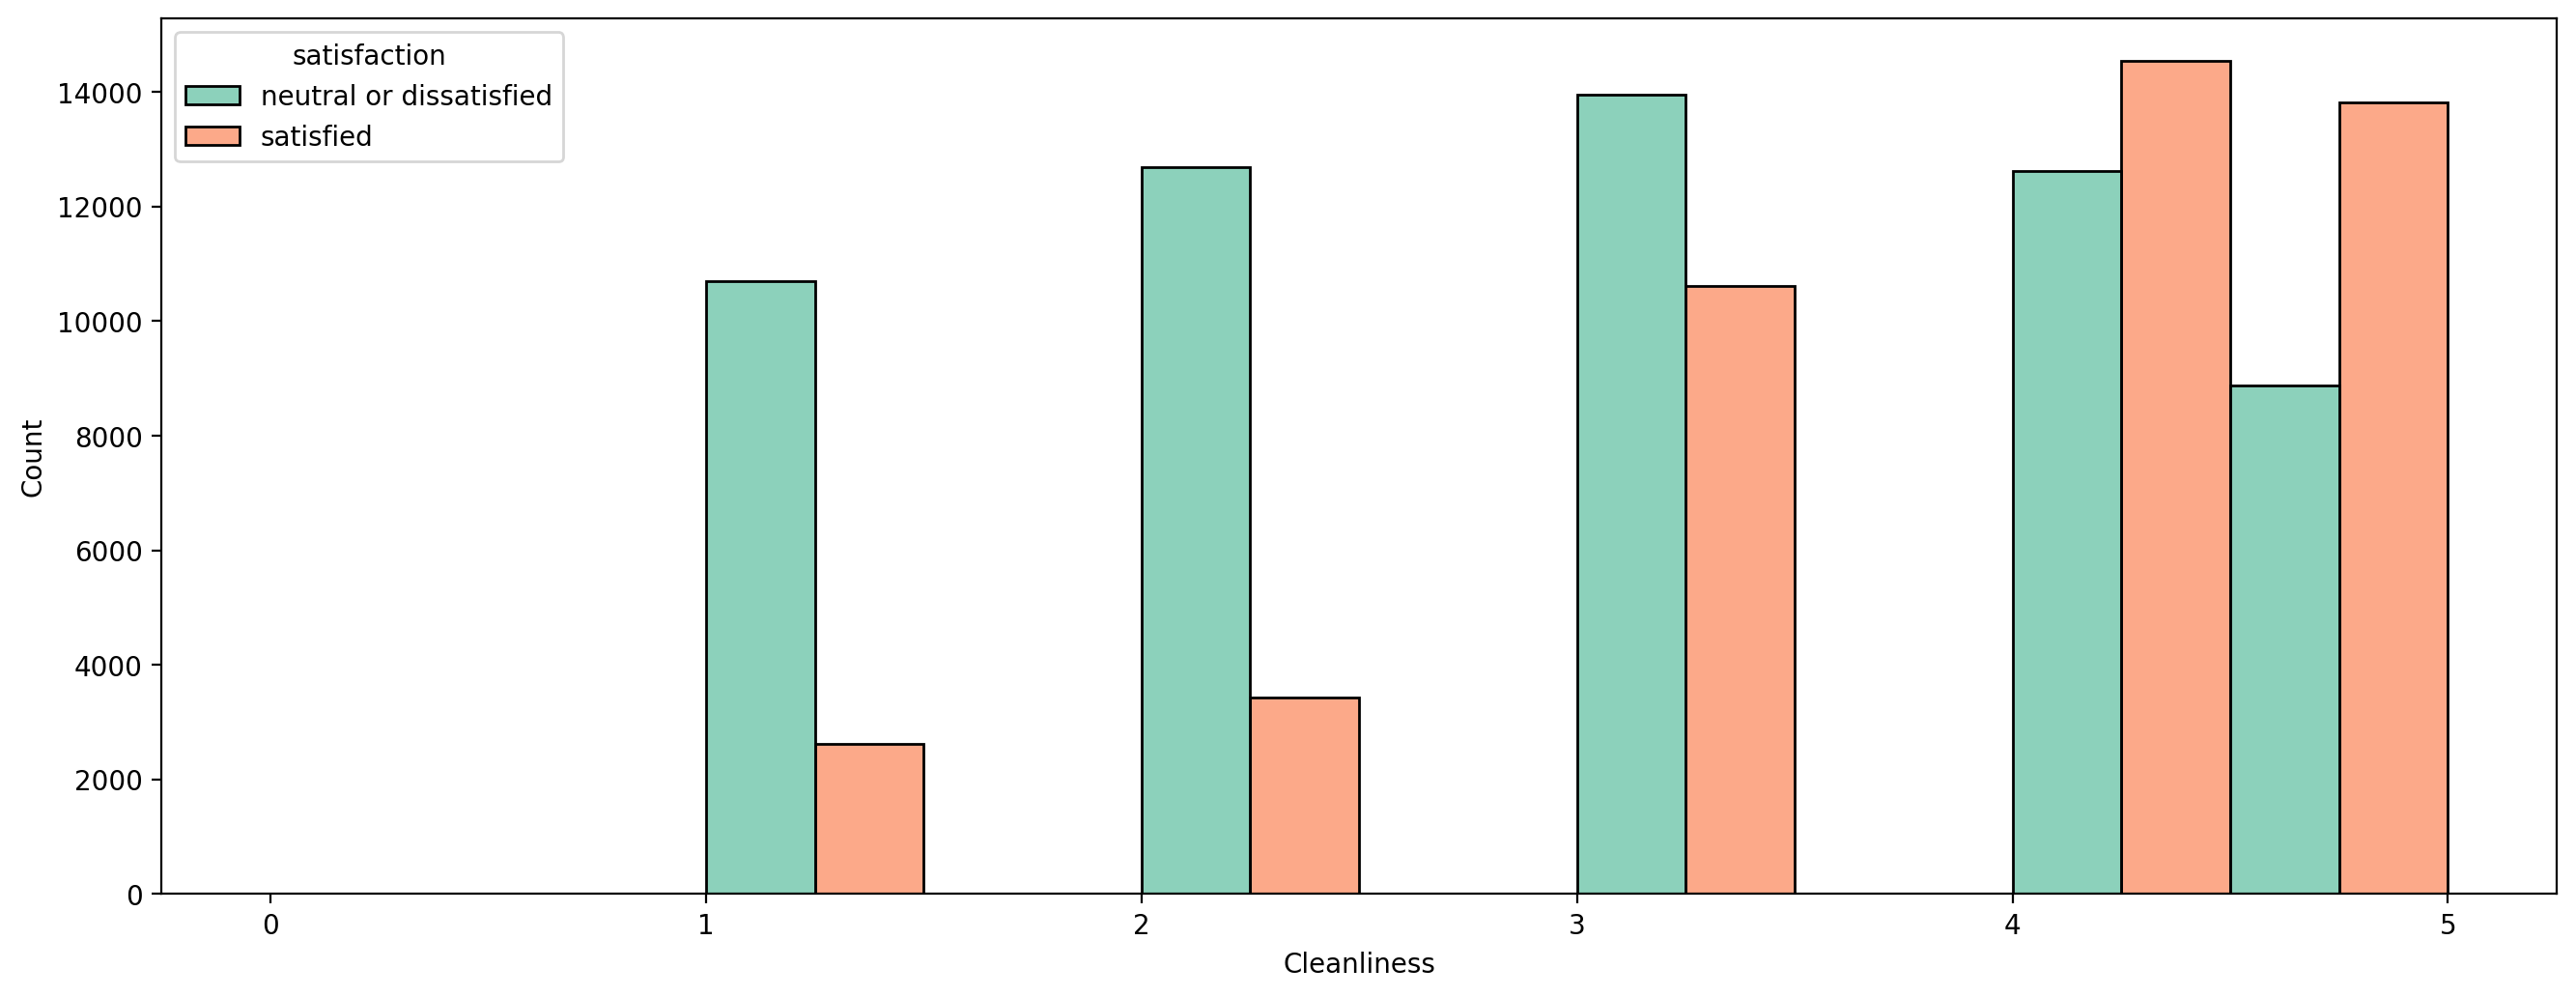

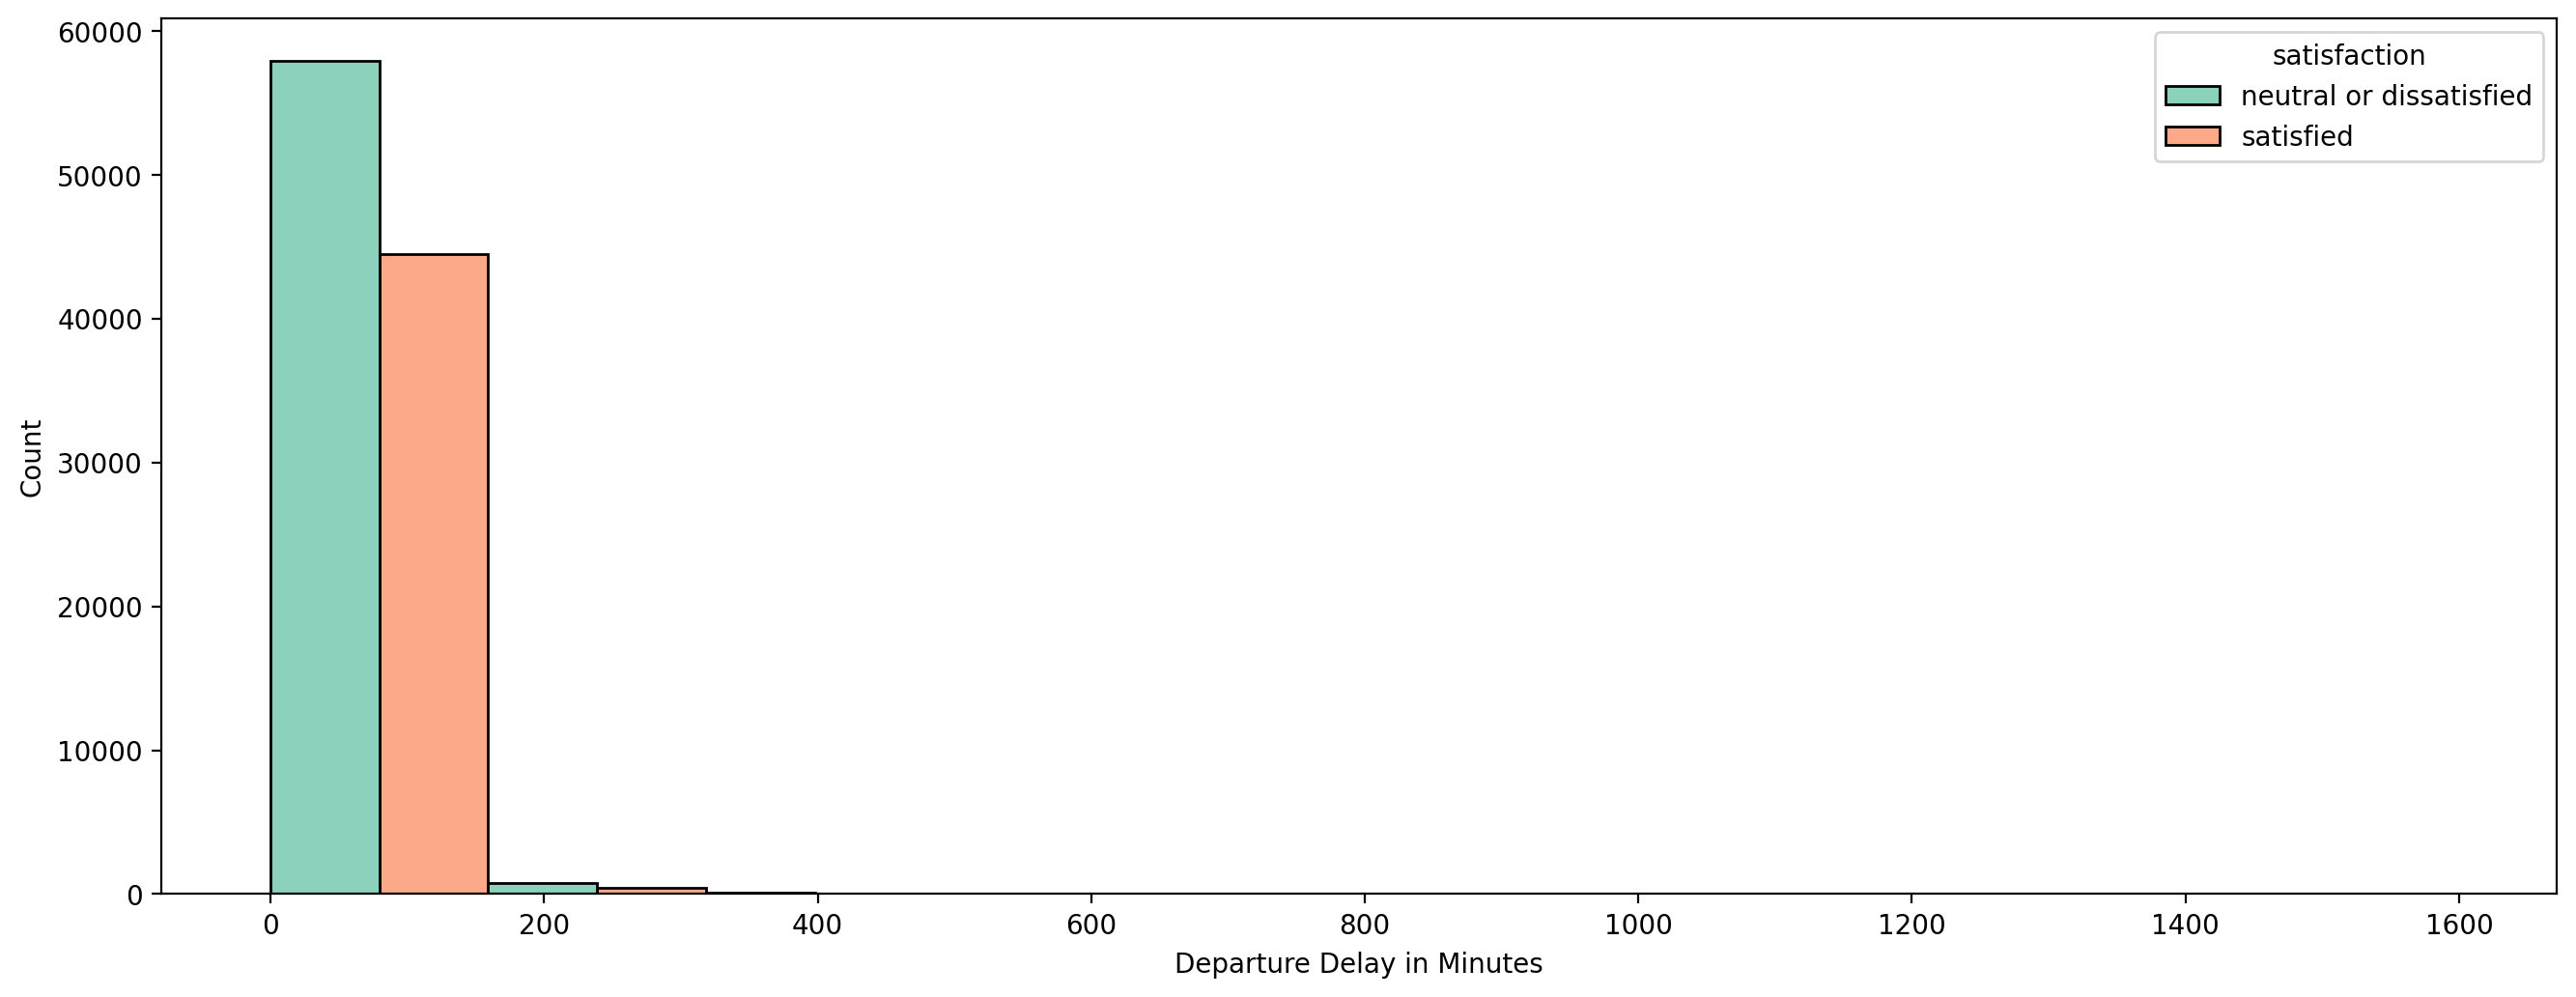

In [49]:
for col in df.select_dtypes(include = ['int64']):
    plt.figure(figsize = (16,6),dpi =200)
    sns.histplot(data=df,x = col,hue = df['satisfaction'],palette = 'Set2',multiple = 'dodge',bins=10)

## Modelling

In [93]:
from sklearn.preprocessing import LabelEncoder
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [97]:
df1 = pd.get_dummies(data=df,drop_first=True,columns=cat_col)

In [98]:
df1

,Age,Flight Distance,Departure Delay in Minutes,Gender_1,Customer Type_1,Type of Travel_1,Class_1,Class_2,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,satisfaction_1
0,13,460,25,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,25,235,1,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,26,1142,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,25,562,11,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,61,214,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,3,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
103900,49,2347,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
103901,30,1995,7,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
103902,22,1000,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [99]:
X = df1.drop('satisfaction_1',axis=1)
y= df1['satisfaction_1']

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,train_size=0.7)

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [104]:
forest = RandomForestClassifier(n_estimators=400)
forest.fit(X_train,y_train)
y_predf = forest.predict(X_test)
print(accuracy_score(y_test,y_predf))

0.9408764275631978


In [105]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_predk = knn.predict(X_test)
print(accuracy_score(y_test,y_predk))

0.45155909149236495


In [106]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_predt = tree.predict(X_test)
print(accuracy_score(y_test,y_predt))

0.8983382522776852
